In [103]:
##' Assignment 3

In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler

In [3]:
#df = pd.read_csv("/kaggle/input/airbnb-berlin-july-2021/listings_berlin.csv")
df = pd.read_csv("./data/listings_berlin.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0


In [4]:
df.shape

(19095, 16)

In [5]:
df_types = pd.DataFrame(df.dtypes, columns=["type"]).reset_index()

<Axes: xlabel='type'>

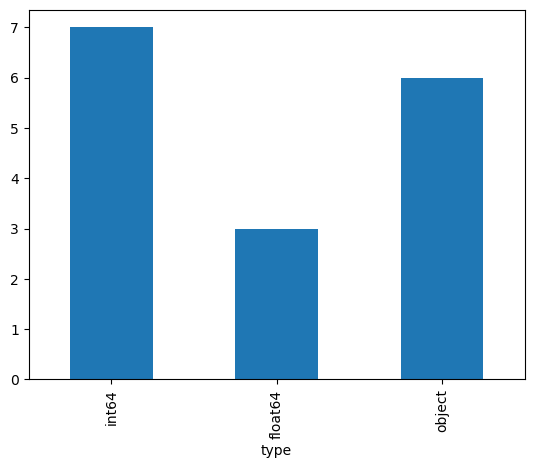

In [6]:
df_types.groupby("type").count().plot(kind='bar', legend=False)

**As one can see the most common type int64, followed by obect and finally float64.**

In [7]:
#Convert if necessary
df["last_review"] = pd.to_datetime(df["last_review"])
df['room_type'] = df['room_type'].astype('category')
df['host_name'] = df['host_name'].astype('category')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df.dtypes


id                                         int64
name                                      object
host_id                                    int64
host_name                               category
neighbourhood_group                     category
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

**Ranges of the float and int values**

In [8]:
'''
int_values = data_train_types[data_train_types["type"] == "int64"]["index"].values
float_values = data_train_types[data_train_types["type"] == "float64"]["index"].values
df[int_values.tolist() + float_values.tolist()].describe().T.sort_values("mean")
'''

'\nint_values = data_train_types[data_train_types["type"] == "int64"]["index"].values\nfloat_values = data_train_types[data_train_types["type"] == "float64"]["index"].values\ndf[int_values.tolist() + float_values.tolist()].describe().T.sort_values("mean")\n'

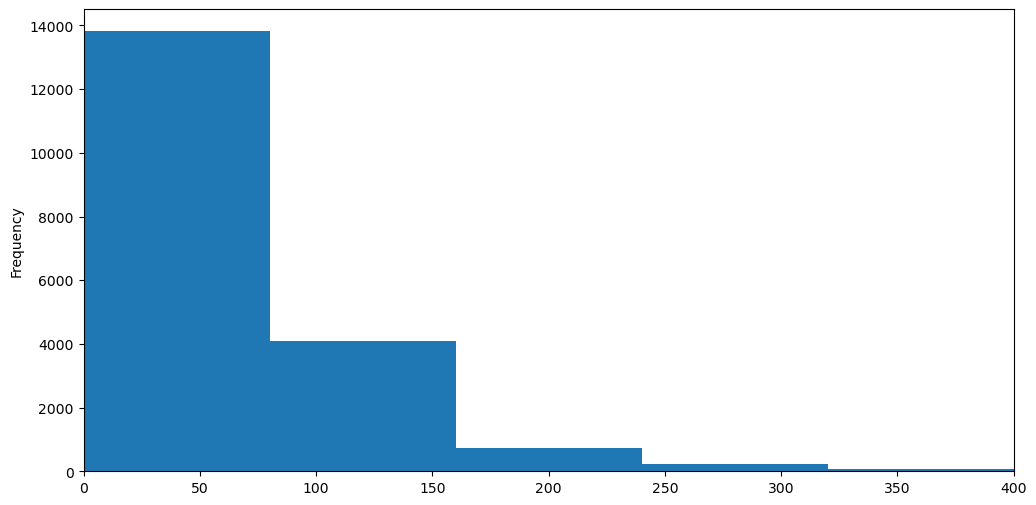

In [10]:
df.price.plot(kind='hist', bins=100, figsize=(12,6),xlim=(0,400));

**As one can see most of the offers are below 100 Euros per night.**

In [11]:
df.price.describe()

count    19095.000000
mean        73.303221
std        136.249622
min          0.000000
25%         35.000000
50%         52.000000
75%         81.000000
max       8000.000000
Name: price, dtype: float64

In [12]:
df.isnull().sum()

id                                   0
name                                30
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4155
reviews_per_month                 4155
calculated_host_listings_count       0
availability_365                     0
dtype: int64

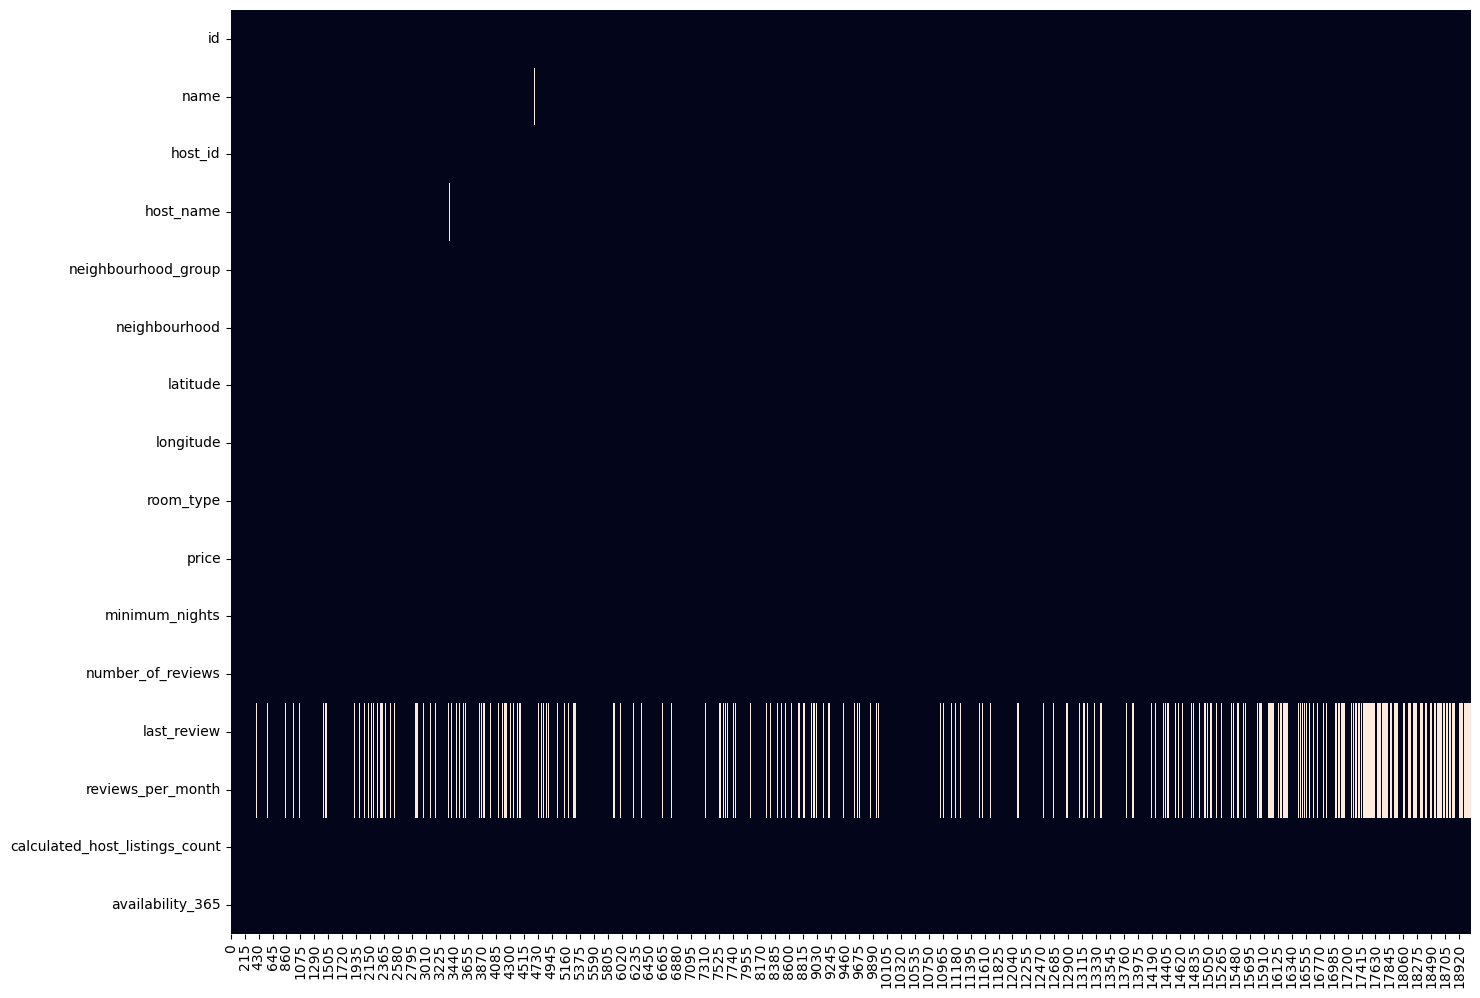

In [13]:
#Underestand where the missing values are clustered
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df.T.isnull(), cbar=False);

In [14]:
#List attributes where most of the data is missing
attributes_with_missing_data = df.isnull().sum(axis=0)
attributes_with_missing_data = attributes_with_missing_data[attributes_with_missing_data > 0]
attributes_with_missing_data = pd.DataFrame(attributes_with_missing_data, columns=["num_nans"])
attributes_with_missing_data.sort_values("num_nans", ascending=False)

,num_nans
last_review,4155
reviews_per_month,4155
name,30
host_name,12


As to be ovserved most of the missing values are located in "last_review" and "reviews_per_month"

### Visualizations

In [15]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0


<Axes: xlabel='reviews_per_month', ylabel='price'>

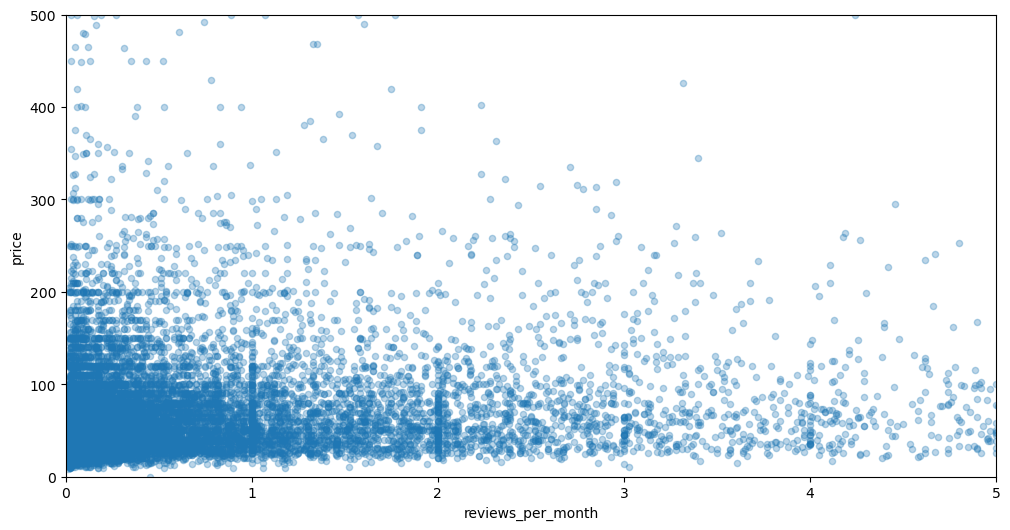

In [16]:
df.plot(kind='scatter', x="reviews_per_month", y="price", alpha=0.3, figsize=(12,6),xlim=(0,5),ylim=(0,500))

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The defa

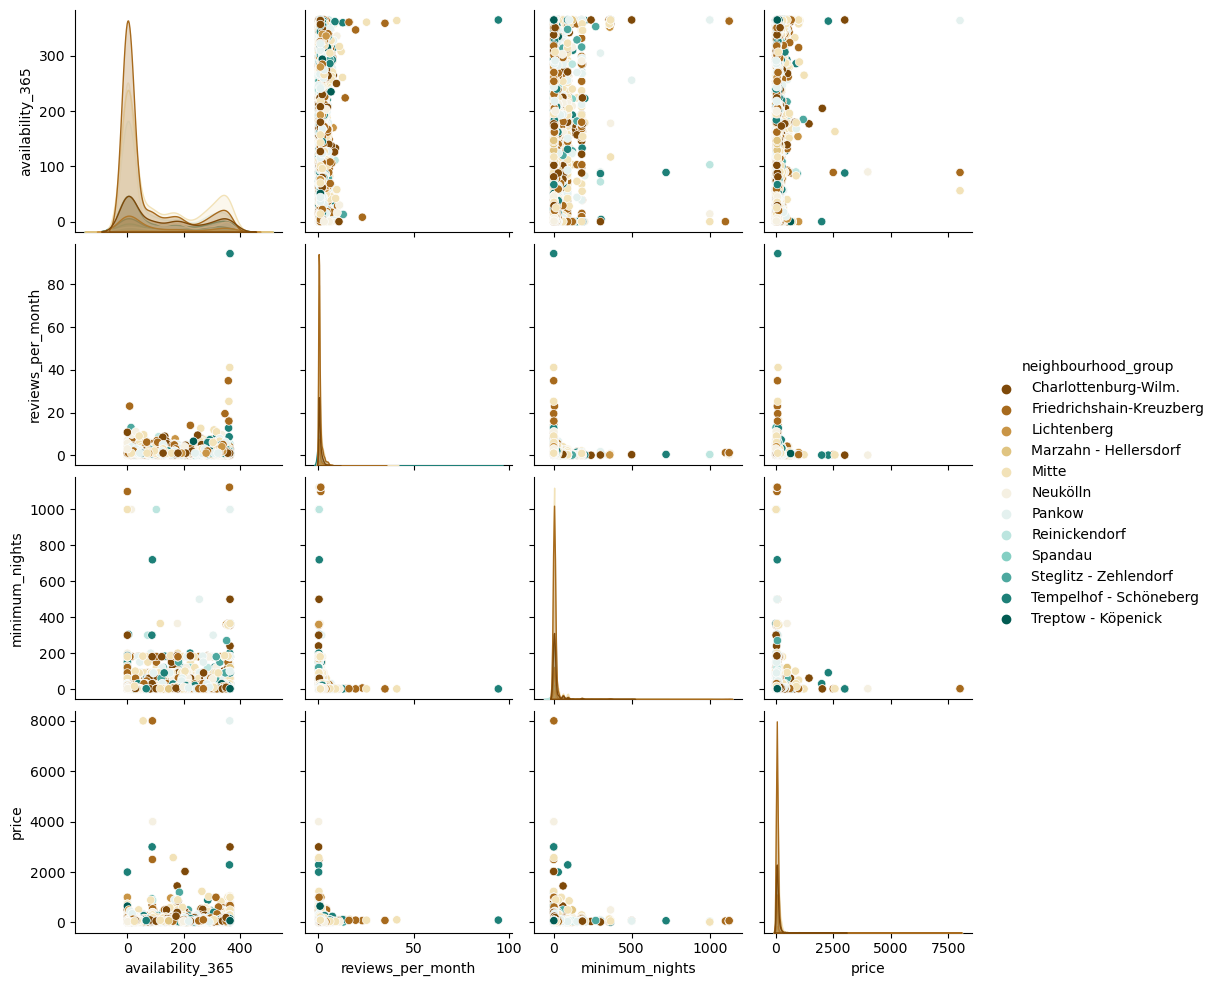

In [17]:
sns.pairplot(df, vars=["availability_365", "reviews_per_month", "minimum_nights", "price"], hue="neighbourhood_group", palette="BrBG");

Preprocessing for the variables "price" , "minimum_nights" and "reviews_per_month" only select the value within the 2.5% to 97.5% percentile to have more interesting plots. 

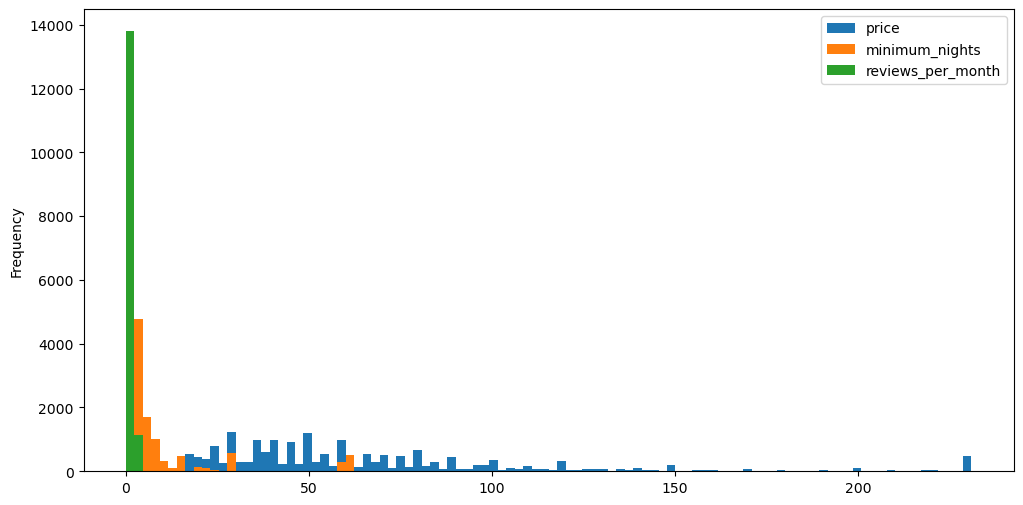

In [18]:
# Define the variables for preprocessing
variables_to_process = ["price", "minimum_nights", "reviews_per_month"]

df_processed = df.copy()

# Apply preprocessing to selected variables
for variable in variables_to_process:
    lower_bound = df_processed[variable].quantile(0.025)
    upper_bound = df_processed[variable].quantile(0.975)
    df_processed[variable] = np.clip(df_processed[variable], lower_bound, upper_bound)

# Plot the histograms after preprocessing
df_processed[variables_to_process].plot(kind='hist', bins=100, figsize=(12, 6));

<Axes: xlabel='reviews_per_month', ylabel='price'>

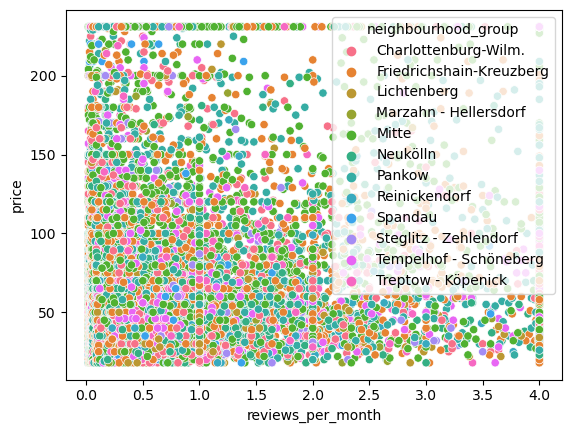

In [20]:
sns.scatterplot(df_processed, x="reviews_per_month", y="price" ,hue="neighbourhood_group")

<Axes: xlabel='minimum_nights', ylabel='price'>

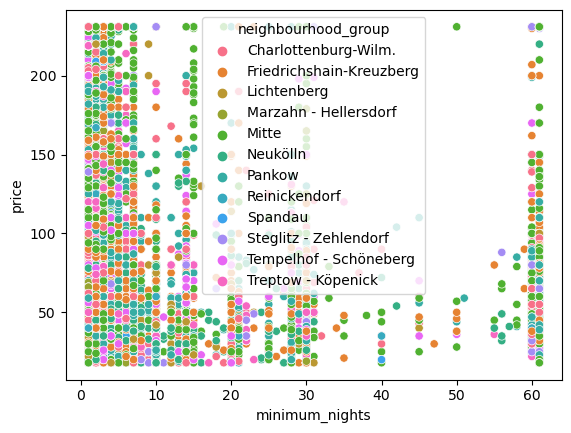

In [21]:
sns.scatterplot(df_processed, x="minimum_nights", y="price" ,hue="neighbourhood_group")

Mean prices per neighborhood

In [22]:
neighborhood_mean=df.groupby('neighbourhood_group')["price"].mean()
neighborhood_mean

C:\Users\Home\AppData\Local\Temp\ipykernel_15652\2465788078.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighborhood_mean=df.groupby('neighbourhood_group')["price"].mean()


neighbourhood_group
Charlottenburg-Wilm.        82.245692
Friedrichshain-Kreuzberg    69.973314
Lichtenberg                 59.887255
Marzahn - Hellersdorf       73.605634
Mitte                       85.505631
Neukölln                    56.919095
Pankow                      77.109359
Reinickendorf               52.239852
Spandau                     74.398551
Steglitz - Zehlendorf       71.493976
Tempelhof - Schöneberg      72.011670
Treptow - Köpenick          67.935484
Name: price, dtype: float64

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Reinickendorf'),
  Text(1, 0, 'Neukölln'),
  Text(2, 0, 'Lichtenberg'),
  Text(3, 0, 'Treptow - Köpenick'),
  Text(4, 0, 'Friedrichshain-Kreuzberg'),
  Text(5, 0, 'Steglitz - Zehlendorf'),
  Text(6, 0, 'Tempelhof - Schöneberg'),
  Text(7, 0, 'Marzahn - Hellersdorf'),
  Text(8, 0, 'Spandau'),
  Text(9, 0, 'Pankow'),
  Text(10, 0, 'Charlottenburg-Wilm.'),
  Text(11, 0, 'Mitte')])

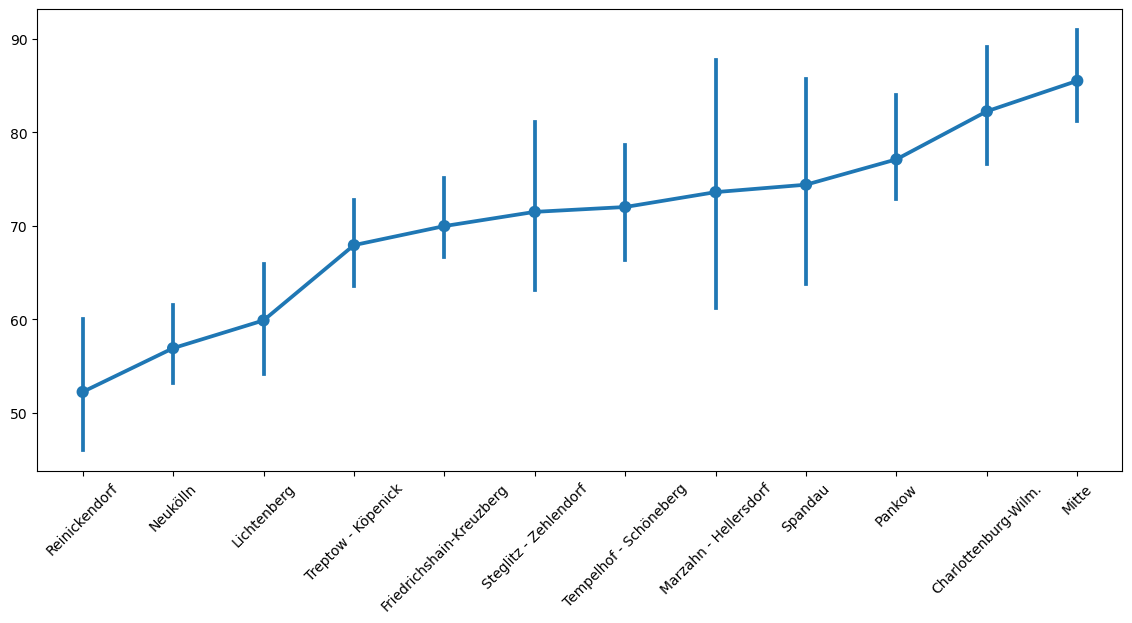

In [23]:
fig, ax = plt.subplots(figsize=(14,6))
sns.pointplot(x      = df.neighbourhood_group.values, 
              y      = df.price.values,
              order  = neighborhood_mean.sort_values().index)
 
plt.xticks(rotation=45)

In [24]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
# calculate correlations
corr_matrix = df[[ 'host_id', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].corr()
corr_matrix


,host_id,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.049102,-0.019798,-0.136464,-0.177672,0.114063,0.171130,0.184891
price,0.049102,1.000000,-0.009228,0.016378,-0.048562,0.053852,0.058771,0.134866
minimum_nights,-0.019798,-0.009228,1.000000,-0.027836,-0.061313,-0.038206,0.041908,0.130396
number_of_reviews,-0.136464,0.016378,-0.027836,1.000000,0.236403,0.592651,0.017520,0.209097
last_review,-0.177672,-0.048562,-0.061313,0.236403,1.000000,0.307021,-0.104867,-0.056155
reviews_per_month,0.114063,0.053852,-0.038206,0.592651,0.307021,1.000000,0.090360,0.238603
calculated_host_listings_count,0.171130,0.058771,0.041908,0.017520,-0.104867,0.090360,1.000000,0.320418
availability_365,0.184891,0.134866,0.130396,0.209097,-0.056155,0.238603,0.320418,1.000000


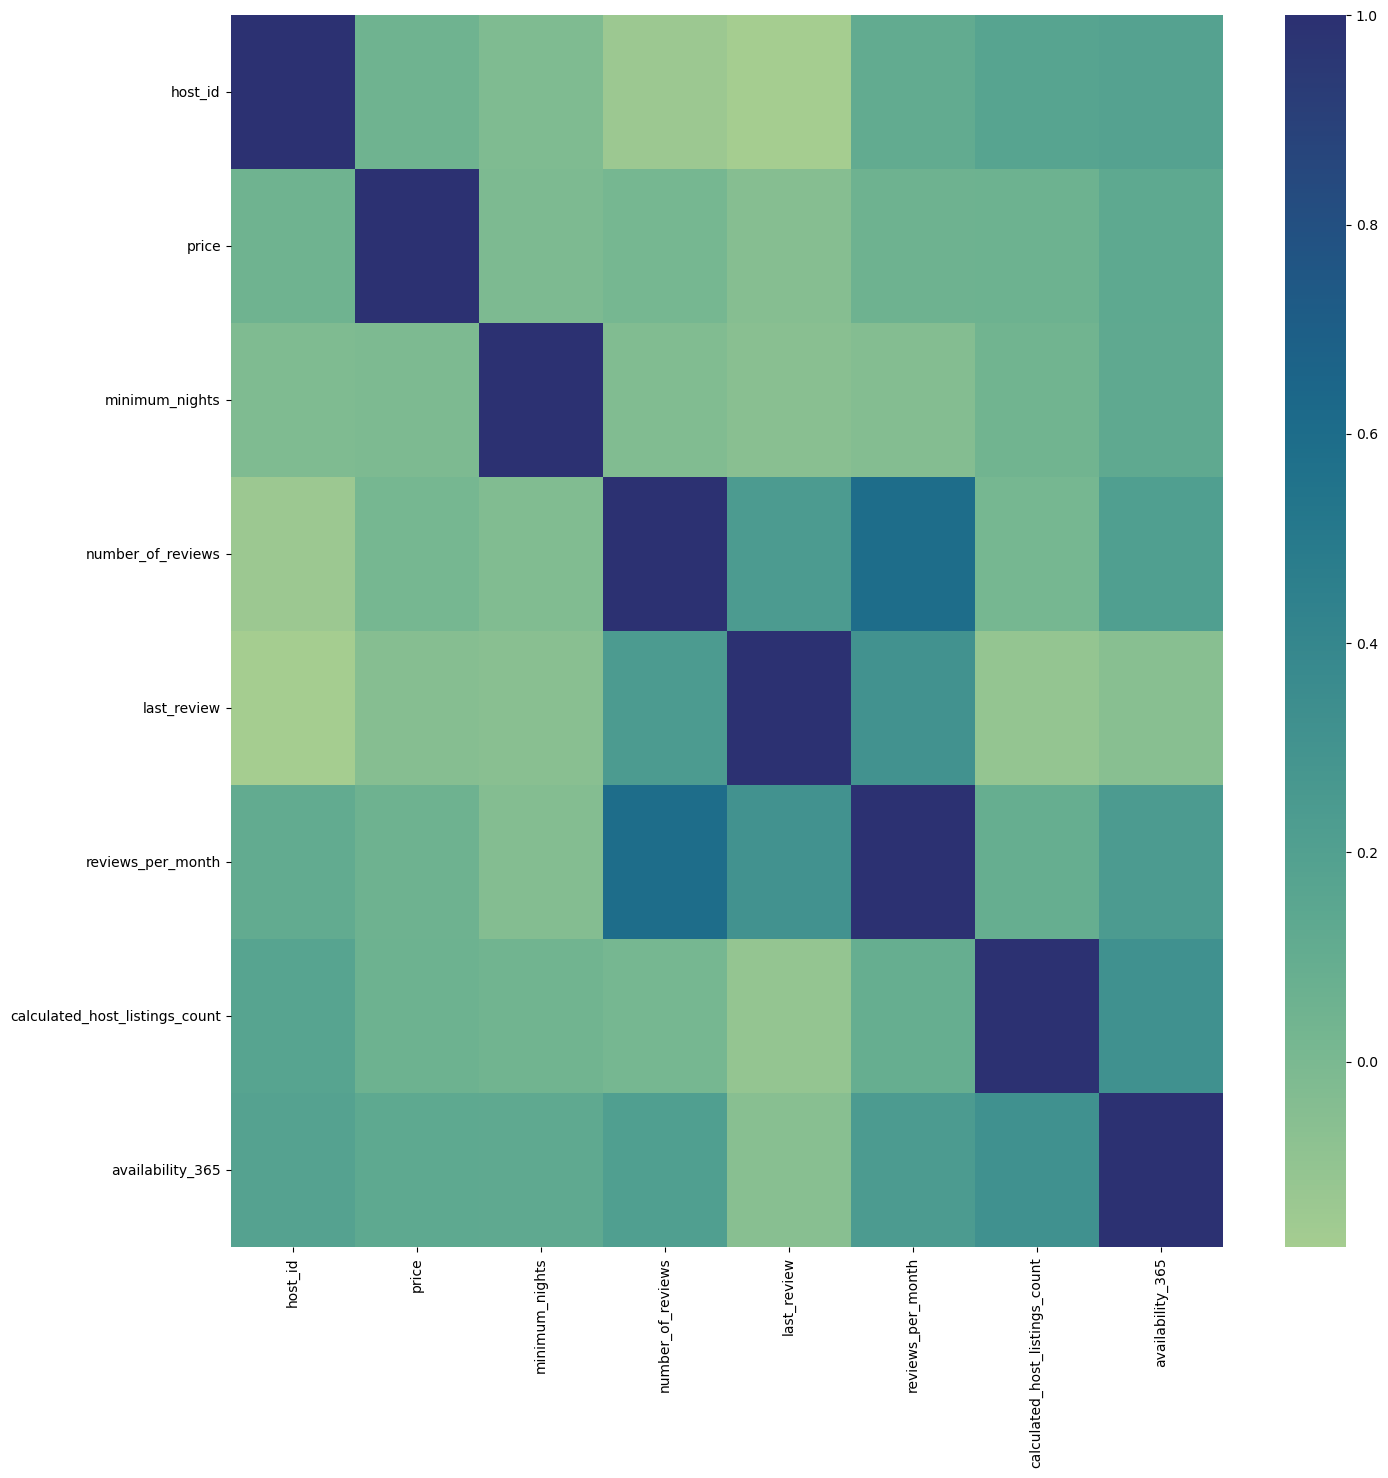

In [26]:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr_matrix, cmap="crest");

In [27]:
for i in df.columns:
    print(f"\item {i} has the data type {df[i].dtype}")

\item id has the data type int64
\item name has the data type object
\item host_id has the data type int64
\item host_name has the data type category
\item neighbourhood_group has the data type category
\item neighbourhood has the data type object
\item latitude has the data type float64
\item longitude has the data type float64
\item room_type has the data type category
\item price has the data type int64
\item minimum_nights has the data type int64
\item number_of_reviews has the data type int64
\item last_review has the data type datetime64[ns]
\item reviews_per_month has the data type float64
\item calculated_host_listings_count has the data type int64
\item availability_365 has the data type int64


In [28]:
df["price"].dtype

dtype('int64')

### Inspect duplicates

In [29]:
# no duplicates across all columns in the dataset
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [30]:
# inspect duplicates by name of apartment
# some apartments with the same name exist, might be different rooms by the same host
pd.concat(g for _, g in df.groupby("name") if len(g) > 1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10563,27120196,1 bdrm apartment in Prenzlauer Berg by StayBea...,163384,Alan & Kasia StayBearlin,Pankow,Prenzlauer Berg Nord,52.54798,13.42601,Entire home/apt,66,3,114,2020-09-12,3.26,10,346
14755,39956169,1 bdrm apartment in Prenzlauer Berg by StayBea...,163384,Alan & Kasia StayBearlin,Pankow,Prenzlauer Berg Nord,52.54687,13.42580,Entire home/apt,56,3,24,2020-03-16,1.38,10,360
17416,45918471,2 Schlafzimmer Apartment am Prager Platz,372068633,Marcin,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.49330,13.33196,Entire home/apt,215,2,4,2021-04-15,0.51,11,210
17457,46020516,2 Schlafzimmer Apartment am Prager Platz,372068633,Marcin,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.49326,13.33211,Entire home/apt,123,2,0,NaT,NaN,11,179
1426,3485841,2 room apartment,9934855,Martin,Neukölln,Neuköllner Mitte/Zentrum,52.48006,13.43575,Entire home/apt,65,2,51,2018-09-16,0.61,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,22400600,Über den Dächern Berlins,10392371,I.,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.49980,13.39663,Private room,35,7,0,NaT,NaN,1,0
1277,2965875,Über den Dächern von Berlin,3419526,Armin,Charlottenburg-Wilm.,Kantstraße,52.50703,13.31983,Entire home/apt,139,4,59,2019-09-30,0.72,1,364
6945,18401634,Über den Dächern von Berlin,127467474,Vlady,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.50602,13.47061,Private room,41,3,150,2021-01-05,3.21,1,13
11205,29094992,Über den Dächern von Berlin,219269053,Gerborg,Mitte,Regierungsviertel,52.50903,13.39490,Private room,50,3,42,2020-03-08,1.28,1,24


In [31]:
# inspect duplicates by latitude and longitude
'''
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[df.duplicated(['latitude', 'longitude'], keep=False)])
'''
df[df.duplicated(['latitude', 'longitude'], keep=False)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
88,176342,11C Landmark/Checkpoint Charlie/120m2/2BATH/3BR,843326,Nino,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.50254,13.391340,Entire home/apt,215,3,53,2020-02-26,0.81,3,290
89,176355,11A Landmark/Checkpoint Charlie/110m2/2BATH/2BR,843326,Nino,Friedrichshain-Kreuzberg,Südliche Friedrichstadt,52.50254,13.391340,Entire home/apt,213,3,31,2021-06-20,0.27,3,322
173,250253,Apartment: Luise in Berlin,1311309,Ute,Charlottenburg-Wilm.,Otto-Suhr-Allee,52.51792,13.307290,Entire home/apt,99,3,34,2019-09-24,0.49,4,278
178,250707,Apartment: Friederike in Berlin,1311309,Ute,Charlottenburg-Wilm.,Otto-Suhr-Allee,52.51792,13.307290,Entire home/apt,61,3,10,2016-09-28,0.17,4,298
186,252967,Pension am Traveplatz Zimmer 1,1328326,Wolfram,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51182,13.470930,Private room,35,2,40,2018-10-08,0.37,3,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19013,50860768,Doppelzimmer mit Boxspringbett 200x200 cm,174923505,Margit,Marzahn - Hellersdorf,Marzahn-Süd,52.54126,13.554639,Private room,69,1,0,NaT,NaN,6,129
19018,50862598,Einzelzimmer,174923505,Margit,Marzahn - Hellersdorf,Marzahn-Süd,52.54126,13.554639,Private room,55,1,0,NaT,NaN,6,150
19044,50903603,Einzelzimmer mit französischem Bett und Badewanne,174923505,Margit,Marzahn - Hellersdorf,Marzahn-Süd,52.54126,13.554639,Private room,66,1,0,NaT,NaN,6,141
19045,50903796,Doppelzimmer,174923505,Margit,Marzahn - Hellersdorf,Marzahn-Süd,52.54126,13.554639,Private room,66,1,0,NaT,NaN,6,145


Even after further inspection we could not identify any duplicates.

### Inspect categorical values

In [32]:
df.describe(include='object')

,name,neighbourhood
count,19065,19095
unique,18545,138
top,Deluxe Apartment in Berlin Mitte,Frankfurter Allee Süd FK
freq,20,1079


In [33]:
df.describe(include='category')

,host_name,neighbourhood_group,room_type
count,19083,19095,19095
unique,5341,12,4
top,Anna,Friedrichshain-Kreuzberg,Entire home/apt
freq,145,4197,10636


<Axes: title={'center': 'Room Type Counts'}, xlabel='room_type'>

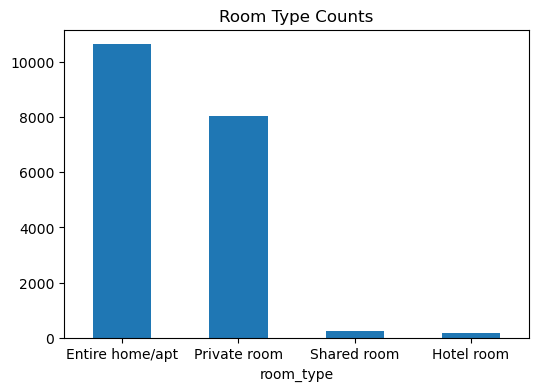

In [34]:
# shared rooms and hotel rooms are quite the minority here
room_type_counts = df['room_type'].value_counts()
room_type_counts.plot(kind='bar', figsize=(6,4), rot = 0, title='Room Type Counts')

<Axes: title={'center': 'Neighbourhood Group Counts'}, xlabel='neighbourhood_group'>

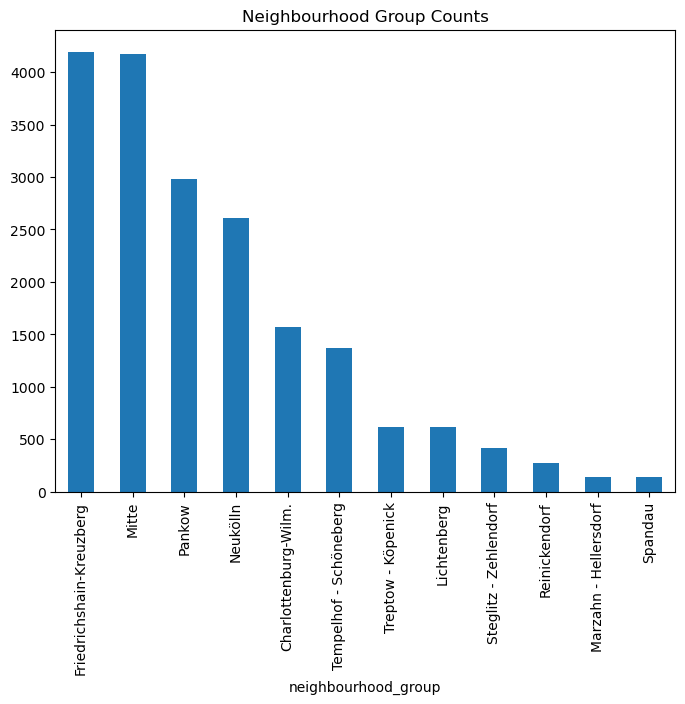

In [35]:
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()
neighbourhood_group_counts.plot(kind='bar', figsize=(8,6), rot = 90, title='Neighbourhood Group Counts')

## Data preparation

#### Datatypes

In [36]:
# inspect datatypes and correct if necessary
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                               category
neighbourhood_group                     category
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

Most of the datatypes are already correctly identified by pandas (or done in the previous steps for visualization).
* Neighbourhood is still represented as an object/string, but it will be dropped anyways, since we decided to only focus on a granularity level of the neighbourhood group. Otherwise we would have to deal with 138 categories.

In [37]:
# inspect unique values for each column
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in id: 19095
Number of unique values in name: 18545
Number of unique values in host_id: 15375
Number of unique values in host_name: 5341
Number of unique values in neighbourhood_group: 12
Number of unique values in neighbourhood: 138
Number of unique values in latitude: 9438
Number of unique values in longitude: 12004
Number of unique values in room_type: 4
Number of unique values in price: 406
Number of unique values in minimum_nights: 105
Number of unique values in number_of_reviews: 364
Number of unique values in last_review: 2213
Number of unique values in reviews_per_month: 596
Number of unique values in calculated_host_listings_count: 32
Number of unique values in availability_365: 366


#### Missing values

In [38]:
df.isnull().sum()

id                                   0
name                                30
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4155
reviews_per_month                 4155
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [39]:
# the name column has 30 missing values, however since they have such a high number of unique values, it will likely not be useful for the machine learning model -> we drop the entire "name" column
df = df.drop(columns=['name'])

# the host_name column has only 12 missing values -> we drop these rows, since they are relatively few data points
df = df.dropna(subset=['host_name'])

In [40]:
missing_last_review = df['last_review'].isnull()
missing_reviews_per_month = df['reviews_per_month'].isnull()

# missing values in last_review and reviews_per_month are always in the same rows
print("Same row is: ", (missing_last_review == missing_reviews_per_month).all())

# check if the number of reviews is 0 for the missing values
print("Number of reviews is 0 for all these rows: ", (df.loc[df['last_review'].isnull(), 'number_of_reviews'] == 0).all())

# -> fill missing review_per_month with 0
df['reviews_per_month'].fillna(0, inplace = True)

# -> fill missing last_review after transformation to a numerical value in the next section

Same row is:  True
Number of reviews is 0 for all these rows:  True


#### Attribute transformations

- last_review

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


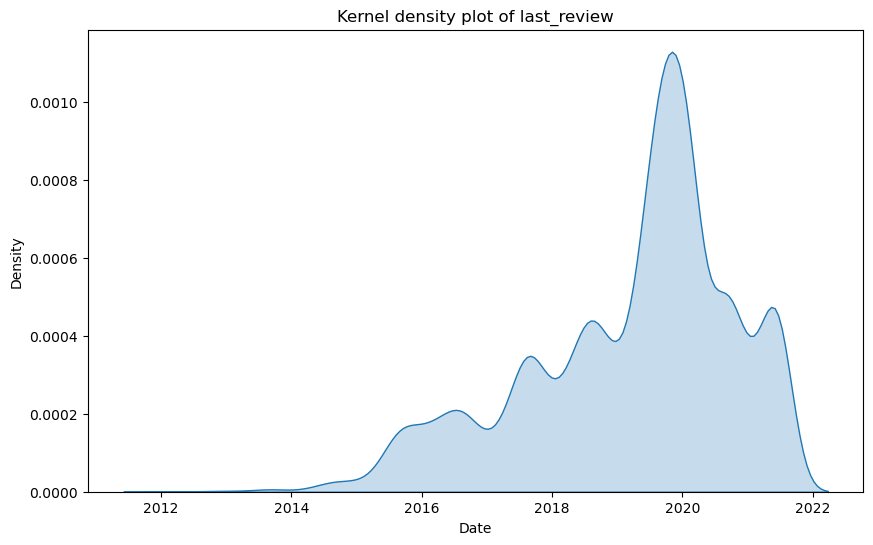

In [41]:
# show distribution of last_review
plt.figure(figsize=(10, 6))
sns.kdeplot(df['last_review'].dropna(), fill=True)
plt.title('Kernel density plot of last_review')
plt.xlabel('Date')
plt.ylabel('Density')

plt.show()

In [42]:
print("Minimum of last_review: ", df['last_review'].min())
print("Maximum of last review: ", df['last_review'].max())

# for better numerical interpretation for the model, we convert the last_review column to the number of days since the last review
# the dataset was compiled on the 12. of July, 2021 -> we use this date as the reference date

df['days_since_last_review'] = (pd.to_datetime('2021-07-12') - df['last_review']).dt.days

Minimum of last_review:  2012-02-15 00:00:00
Maximum of last review:  2021-07-12 00:00:00


In [43]:
# slightly left skewed distribution -> might use a log transformation later
df['days_since_last_review'].describe()

count    14933.000000
mean       845.580995
std        584.863009
min          0.000000
25%        491.000000
50%        688.000000
75%       1174.000000
max       3435.000000
Name: days_since_last_review, dtype: float64

In [44]:
# we can now impute the missing values for the days_since_last_review column
# a low value in the column indicates a recent review, so we fill the missing values which have no reviews yet with a high value -> we use the max value

df['days_since_last_review'].fillna(df['days_since_last_review'].max(), inplace = True)
df['days_since_last_review'] = df['days_since_last_review'].astype(int) # convert to int
df = df.drop(columns=['last_review']) # drop the original column
df.isnull().sum() # no more missing values

id                                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
days_since_last_review            0
dtype: int64

- latitude and longitude

We don't think latitude and longitude on it's own will be too benefical in our analysis, but in the first step of exploring the data we saw the importance of location reflected in the price. Thus, we will use latitude and longitude to calculate the closeness of an airbnb establishement to the berlin city center.

The (subjective) coordinates of berlin city center: 52.520008, 13.404954. (https://www.latlong.net/place/berlin-germany-9966.html)

In [45]:
coords_berlin = (52.520008, 13.404954) # center of berlin

def calc_center_distance(row):
    coords_listing = (row['latitude'], row['longitude'])
    return geodesic(coords_berlin, coords_listing).km

df['center_distance'] = df.apply(calc_center_distance, axis=1)

In [46]:
df.center_distance.describe()

count    19083.000000
mean         4.766646
std          3.120149
min          0.000351
25%          2.983081
50%          4.166443
75%          5.698705
max         26.025600
Name: center_distance, dtype: float64

- calculated host listings count

The host listings count shows a right skewed distribution -> we might use a log transformation in later steps

In [47]:
df.calculated_host_listings_count.describe()

count    19083.000000
mean         3.137190
std          7.775506
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         76.000000
Name: calculated_host_listings_count, dtype: float64

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


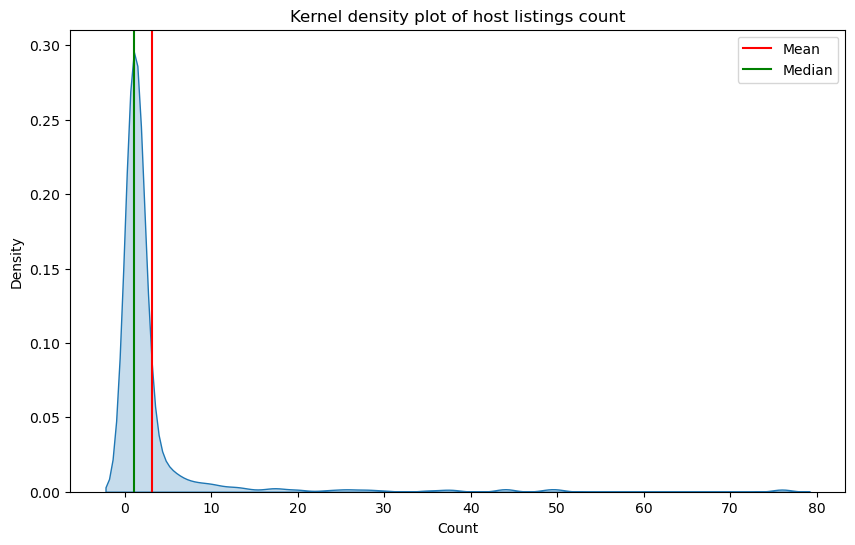

In [48]:
# show distribution of calculated_host_listings_count
plt.figure(figsize=(10, 6))
sns.kdeplot(df['calculated_host_listings_count'], fill=True)
plt.title('Kernel density plot of host listings count')
plt.xlabel('Count')
plt.ylabel('Density')

mean_hlc = df['calculated_host_listings_count'].mean()
median_hlc = df['calculated_host_listings_count'].median()

plt.axvline(mean_hlc, color='red', label='Mean')
plt.axvline(median_hlc, color='green', label='Median')
plt.legend()

plt.show()

- availability_365

Quite a lot of listings have 0 availability throughout the year

Also right skewed

In [49]:
df.availability_365.describe()

count    19083.000000
mean        91.310329
std        127.652045
min          0.000000
25%          0.000000
50%          0.000000
75%        175.500000
max        365.000000
Name: availability_365, dtype: float64

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


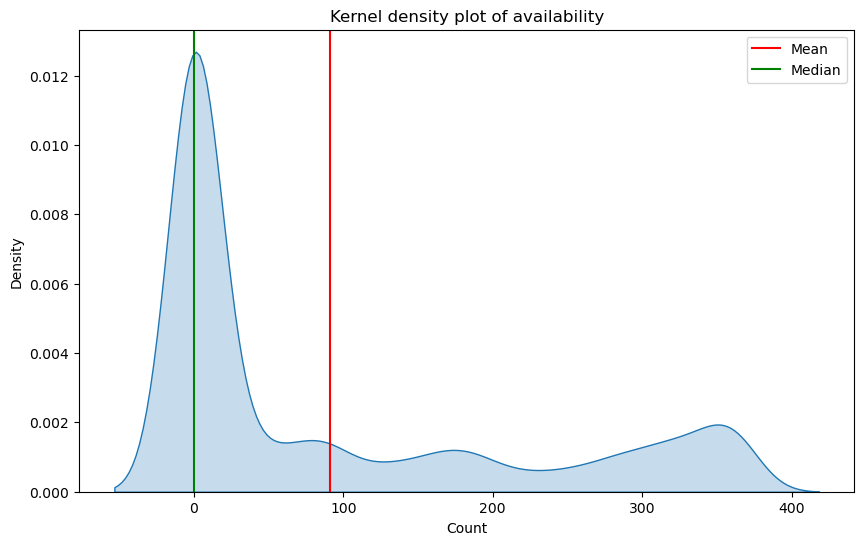

In [50]:
# show distribution of availability_365
plt.figure(figsize=(10, 6))
sns.kdeplot(df['availability_365'], fill=True)
plt.title('Kernel density plot of availability')
plt.xlabel('Count')
plt.ylabel('Density')

mean_availability = df['availability_365'].mean()
median_availability = df['availability_365'].median()

plt.axvline(mean_availability, color='red', label='Mean')
plt.axvline(median_availability, color='green', label='Median')
plt.legend()

plt.show()

Other potentials for attribute transformations:
* host_name: high number of unique values -> optimally we would create a binary category indicating if the hosts have a german name or not. We think that might have an influence on a few airbnb guests. However, this is not really possible in the given amount of time, since this could be a separate machine learning task and manually annotating would take a very long time for almost 20.000 entries.


#### Outliers

In [51]:
df.minimum_nights.describe()

count    19083.000000
mean         9.110308
std         33.646056
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1124.000000
Name: minimum_nights, dtype: float64

<Axes: xlabel='minimum_nights'>

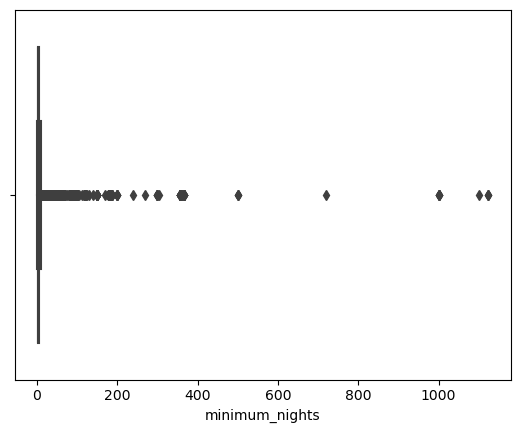

In [52]:
# inspect high values for minimum nights, as 1124 sounds very unrealistic
sns.boxplot(x=df['minimum_nights'])

In [53]:
# there are actually quite a few listings with a minimum stay of > 300 nights
potential_outliers = df[df['minimum_nights'] > 30]
print(len(potential_outliers))

# this might not be an error in the data, but basically long term airbnb rentals
# still, we decided to focus more on short term rentals and therefore drop all listings with a minimum stay of > 30 nights
df = df[df['minimum_nights'] <= 30] 

909


In [54]:
print(df.price.describe())
print(df[df['price'] == 0])

count    18174.000000
mean        73.416639
std        137.541296
min          0.000000
25%         35.000000
50%         52.000000
75%         81.750000
max       8000.000000
Name: price, dtype: float64
             id    host_id                       host_name  \
15857  42279207  273509888  Classik Hotel Hackescher Markt   
16011  42583346  316070228  Hotel Delta Am Potsdamer Platz   
16081  42687506  304236789                      Pentahotel   
16331  43247575  312172749             Aletto Hotel Kudamm   
17332  45693213  370237375                          Sircle   
17383  45841246  371642141                         Pestana   
17764  47112187  380683890                          Sircle   

        neighbourhood_group                neighbourhood   latitude  \
15857                 Mitte               Alexanderplatz  52.523220   
16011                 Mitte               Tiergarten Süd  52.501200   
16081    Treptow - Köpenick  Kölln. Vorstadt/Spindlersf.  52.443970   
16331  Charlott

In [55]:
# some prices are zero (these are all hotel rooms, the exact reasons are unknown) -> we drop these rows
df = df[df['price'] > 0]

In [56]:
# prices > 1000 are not the norm, but still possible -> we keep these rows
df[df['price'] > 1000]

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,center_distance
1256,2860420,14623546,Jean Luc,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.49185,13.41961,Entire home/apt,2500,1,19,0.25,1,89,2098,3.287573
6240,16525958,40060996,Christoph,Mitte,Osloer Straße,52.55547,13.38642,Entire home/apt,1050,2,3,0.05,1,364,1600,4.141664
6413,17008663,1338050,Jean-Jacques,Tempelhof - Schöneberg,Schöneberg-Nord,52.49051,13.34593,Entire home/apt,2000,30,4,0.08,1,0,1496,5.180479
7684,19961235,102979040,Team Suite030,Mitte,Alexanderplatz,52.52267,13.39935,Entire home/apt,2575,2,8,0.17,14,163,987,0.482119
10101,25539081,89306331,Hanne,Neukölln,Rixdorf,52.47790,13.43968,Entire home/apt,4000,1,3,0.08,1,90,1082,5.245652
10302,26289016,12917471,Torsten,Steglitz - Zehlendorf,Zehlendorf Südwest,52.42516,13.18048,Entire home/apt,1200,1,0,0.00,1,185,3435,18.548980
11128,28879436,212377709,Hotel Zoo,Charlottenburg-Wilm.,Kurfürstendamm,52.50372,13.32913,Hotel room,2025,1,0,0.00,7,205,3435,5.457594
11129,28879438,212377709,Hotel Zoo,Charlottenburg-Wilm.,Kurfürstendamm,52.50372,13.32913,Hotel room,2025,1,0,0.00,7,205,3435,5.457594
11182,29022451,42671030,Gorki Apartments,Mitte,Brunnenstr. Süd,52.53124,13.40085,Entire home/apt,1032,1,0,0.00,6,289,3435,1.280528
11183,29022524,42671030,Gorki Apartments,Mitte,Brunnenstr. Süd,52.53150,13.40227,Entire home/apt,1235,1,5,0.24,6,265,535,1.291708


#### Scaling

Scaling might be benefical, due to the difference in ranges of some variables. We have to keep in mind that we lose some interpretability if we choose to scale the variables. But our main goal is to predict rental prices, so the loss of interpretability might be compensated for if we achieve a more accurate model.

We aim to experiment with different scaling methods. For now we chose to scale all numerical variables, except the target variable price.

In [57]:
numerical_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 
                'availability_365', 'days_since_last_review', 'center_distance']

# function to scale numerical explanatory variables using min max scaling
def scale_numerical_variables(df, numerical_cols):
    df_scaled = df.copy()
    scaler = MinMaxScaler()
    df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

    return df_scaled

df_scaled = scale_numerical_variables(df, numerical_cols)
df_scaled.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,center_distance
3,3309,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,0.206897,0.043548,0.002968,0.0,0.780822,0.308879,0.170858
4,6883,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,0.206897,0.217742,0.010811,0.0,0.000000,0.055604,0.130056
5,7071,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,0.000000,0.472581,0.025861,0.0,0.000000,0.168559,0.101998
6,9991,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,200,0.172414,0.012903,0.001802,0.0,0.002740,0.161572,0.064070
9,17904,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,49,0.137931,0.462903,0.023953,0.0,0.789041,0.051528,0.118670


#### One to n encoding

For categorical variables: neighbourhood_group, room_type

Scikit learn models usually should be able to handle the categorical dtypes from pandas dataframes. Though this dependes on the method we finally choose. For now, we will one hot encode the categorical variables.

We have to keep in mind, that the dimensionality will increase by the number of categories.

In [58]:
def encode_categorical_variables(df, categorical_cols):
    df_encoded = df.copy()
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
    return df_encoded

df_encoded = encode_categorical_variables(df_scaled, ['neighbourhood_group', 'room_type'])
df_encoded.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,...,neighbourhood_group_Neukölln,neighbourhood_group_Pankow,neighbourhood_group_Reinickendorf,neighbourhood_group_Spandau,neighbourhood_group_Steglitz - Zehlendorf,neighbourhood_group_Tempelhof - Schöneberg,neighbourhood_group_Treptow - Köpenick,room_type_Hotel room,room_type_Private room,room_type_Shared room
3,3309,4108,Jana,Schöneberg-Nord,52.49884,13.34940,29,0.206897,0.043548,0.002968,...,False,False,False,False,False,True,False,False,True,False
4,6883,16149,Steffen,Frankfurter Allee Süd FK,52.51163,13.45289,79,0.206897,0.217742,0.010811,...,False,False,False,False,False,False,False,False,False,False
5,7071,17391,BrightRoom,Helmholtzplatz,52.54301,13.41534,33,0.000000,0.472581,0.025861,...,False,True,False,False,False,False,False,False,True,False
6,9991,33852,Philipp,Prenzlauer Berg Südwest,52.53269,13.41805,200,0.172414,0.012903,0.001802,...,False,True,False,False,False,False,False,False,False,False
9,17904,68997,Matthias,Reuterstraße,52.49419,13.42166,49,0.137931,0.462903,0.023953,...,True,False,False,False,False,False,False,False,False,False


#### Log transformation

As mentioned earlier, some variables seem to be somewhat skewed, we will inspect if log transforming these will result in more highly normal distributed values.

In [59]:
transform_cols_test = ['number_of_reviews', 'minimum_nights', 'days_since_last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

def log_transform(df, transform_cols):
    df_log = df.copy()
    df_log[transform_cols] = np.log(df_log[transform_cols])

    return df_log

df_log_test = log_transform(df_encoded, transform_cols_test)

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

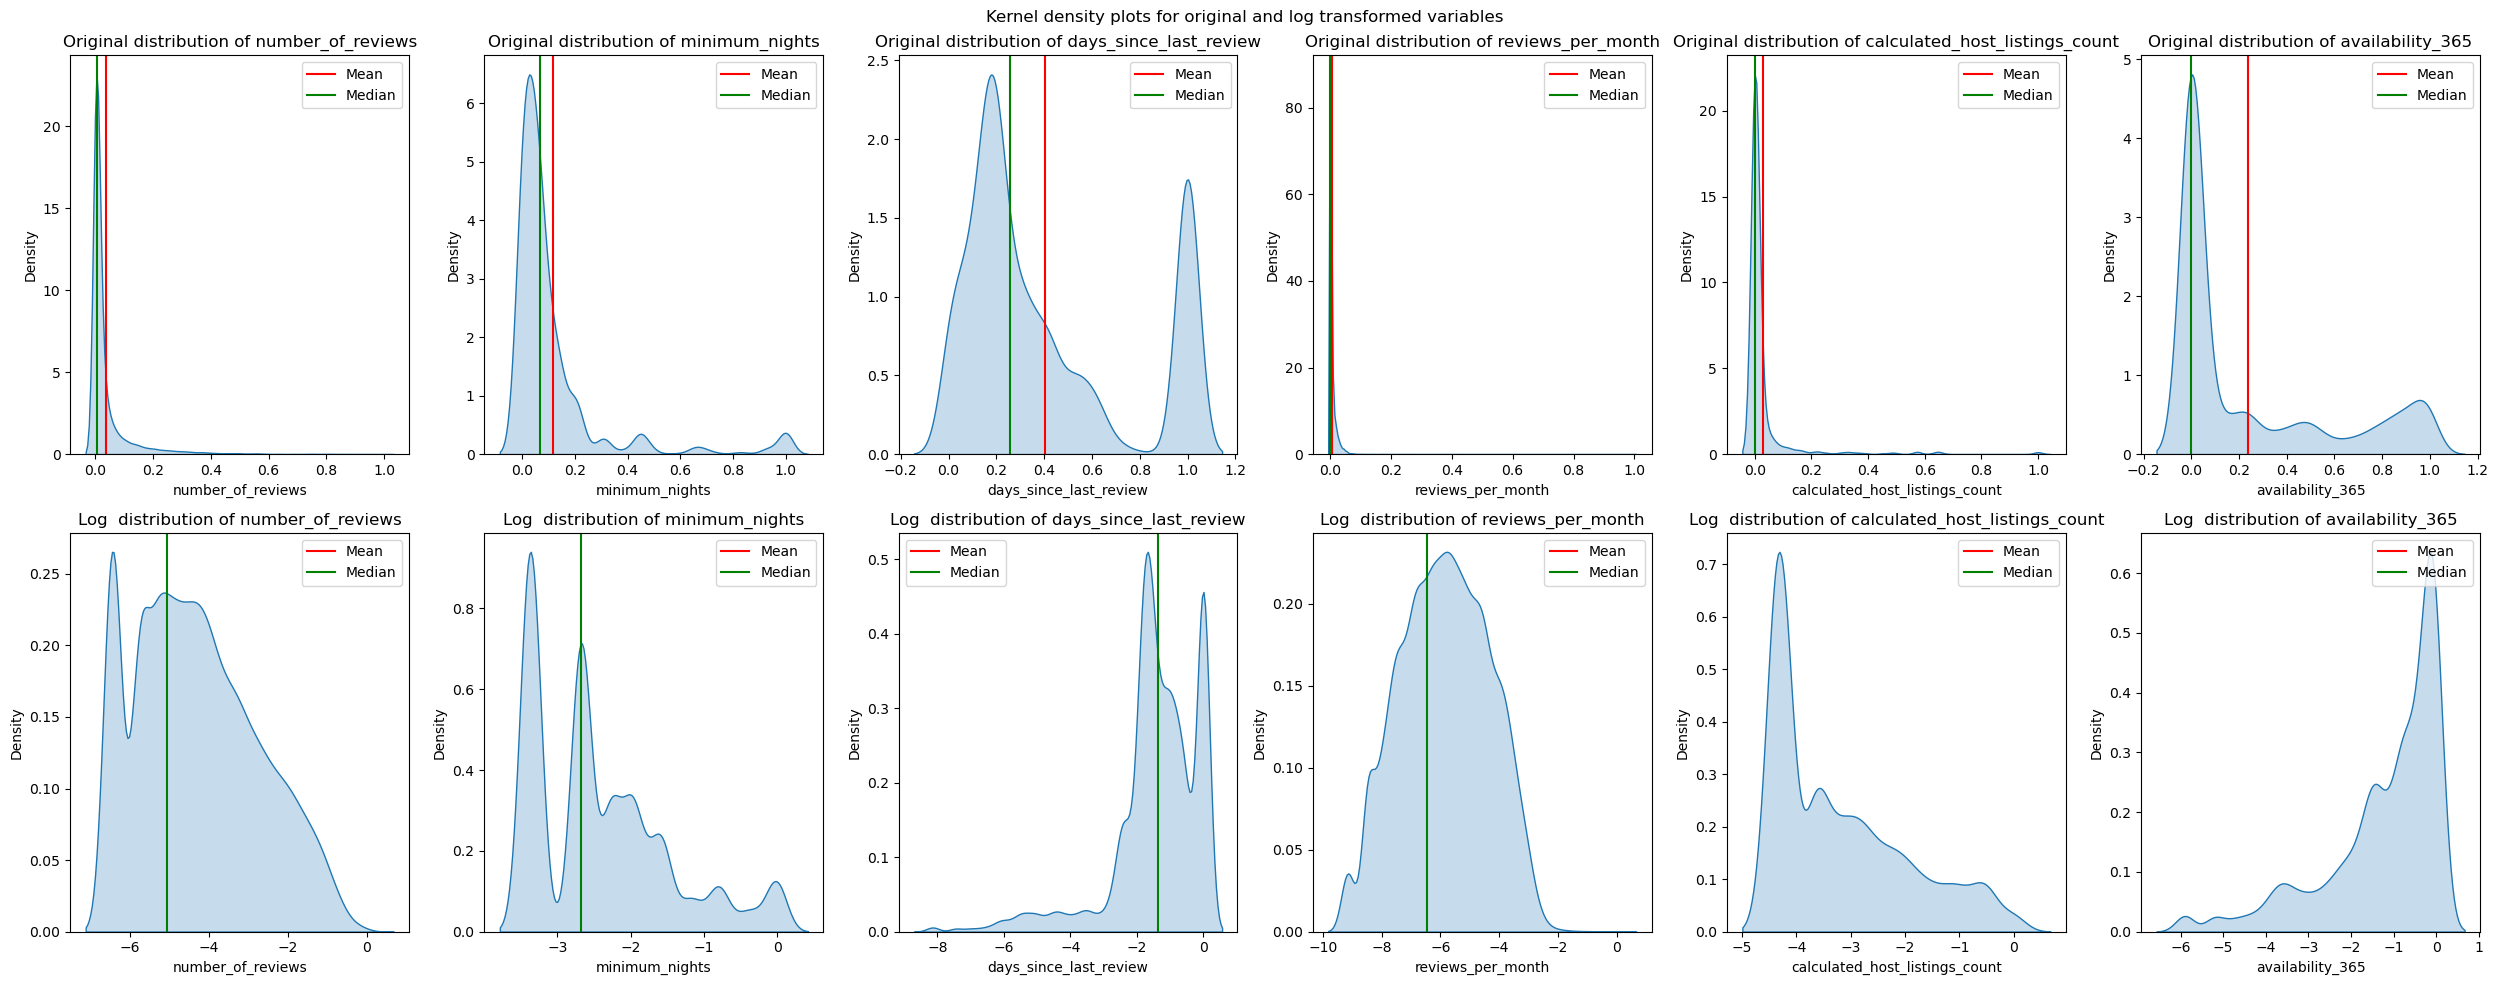

In [60]:
def kernel_density_plot(df, col, ax, title_prefix=''):
    sns.kdeplot(df[col], fill=True, ax=ax)
    ax.set_title(f'{title_prefix} distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

    mean = df[col].mean()
    median = df[col].median()

    ax.axvline(mean, color='red', label='Mean')
    ax.axvline(median, color='green', label='Median')
    ax.legend()

fig, axes = plt.subplots(nrows = 2, ncols = len(transform_cols_test), figsize=(25, 10))
fig.suptitle('Kernel density plots for original and log transformed variables')

for i, col in enumerate(transform_cols_test):
    kernel_density_plot(df_encoded, col, ax=axes[0, i], title_prefix='Original')

# Log-Transformed DataFrame
for i, col in enumerate(transform_cols_test):
    kernel_density_plot(df_log_test, col, ax=axes[1, i], title_prefix='Log ')

plt.tight_layout()
plt.show()

From the plots, we can see that most often the log transformation does not seem to have the greatest impact, as the mean and median is also in the orginial plots not too far apart.
For now, we choose to not log transform any variables (also some values seem to reach inf when log transforming), but plan to experiment with it further when chosing the final model.

#### Removal

Finally we remove the following attributes:

* id and host_id: not useful for the model
* host_name: too many unique values and unfortunately not able to group them further
* latitude and longitude: use the transformed attribute center_distance
* neighbourhood: use neighbourhood group instead

In [61]:
cols_to_drop = ['id', 'host_id', 'host_name', 'latitude', 'longitude', 'neighbourhood']

df_final = df_encoded.drop(columns=cols_to_drop)
df_final.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,center_distance
count,18167.000000,18167.000000,18167.000000,18167.000000,18167.000000,18167.000000,18167.000000,18167.000000
mean,73.444928,0.115898,0.035444,0.006110,0.027602,0.236823,0.404005,0.183490
std,137.560241,0.198500,0.079621,0.014188,0.103897,0.344878,0.342643,0.119738
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.034483,0.001613,0.000212,0.000000,0.000000,0.158952,0.115612
50%,52.000000,0.068966,0.006452,0.001590,0.000000,0.000000,0.258224,0.160408
75%,82.000000,0.103448,0.027419,0.006465,0.013333,0.443836,0.587191,0.218512
max,8000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Modeling**

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import enet_path, lasso_path

from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso, Ridge

To identify a possibly interesting algorithm, we inspect the recommendations from sklearn
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
Based on the schema provided the fist erstimated for the data used is ElasticNet

In [63]:
df_final

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,center_distance,neighbourhood_group_Friedrichshain-Kreuzberg,neighbourhood_group_Lichtenberg,...,neighbourhood_group_Neukölln,neighbourhood_group_Pankow,neighbourhood_group_Reinickendorf,neighbourhood_group_Spandau,neighbourhood_group_Steglitz - Zehlendorf,neighbourhood_group_Tempelhof - Schöneberg,neighbourhood_group_Treptow - Köpenick,room_type_Hotel room,room_type_Private room,room_type_Shared room
3,29,0.206897,0.043548,0.002968,0.000000,0.780822,0.308879,0.170858,False,False,...,False,False,False,False,False,True,False,False,True,False
4,79,0.206897,0.217742,0.010811,0.000000,0.000000,0.055604,0.130056,True,False,...,False,False,False,False,False,False,False,False,False,False
5,33,0.000000,0.472581,0.025861,0.000000,0.000000,0.168559,0.101998,False,False,...,False,True,False,False,False,False,False,False,True,False
6,200,0.172414,0.012903,0.001802,0.000000,0.002740,0.161572,0.064070,False,False,...,False,True,False,False,False,False,False,False,False,False
9,49,0.137931,0.462903,0.023953,0.000000,0.789041,0.051528,0.118670,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,90,0.034483,0.000000,0.000000,0.000000,0.320548,1.000000,0.185117,False,False,...,False,False,False,False,False,False,False,False,False,False
19091,78,0.034483,0.000000,0.000000,0.000000,0.183562,1.000000,0.152944,False,False,...,False,False,False,False,False,True,False,False,False,False
19092,35,0.068966,0.000000,0.000000,0.013333,0.002740,1.000000,0.178051,False,False,...,True,False,False,False,False,False,False,False,True,False
19093,49,0.517241,0.000000,0.000000,0.000000,0.068493,1.000000,0.034468,False,False,...,False,False,False,False,False,False,False,False,True,False


In [64]:
X=df_final.loc[:, df_final.columns != "price"]
y=df_final.loc[:, df_final.columns == "price"]

In [65]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [77]:
print("Size X: ", len(X))
print("Size X_train: ", len(X_train))
print("Size X_val: ", len(X_val))
print("Size X_test: ", len(X_test))
print("Size X_temp: ", len(X_temp))

Size X:  18167
Size X_train:  12716
Size X_val:  2725
Size X_test:  2726
Size X_temp:  5451


In [66]:
# Define the Elastic Net model
elastic_net = ElasticNet(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.1,  0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9],
}

# Create GridSearchCV object
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Create a new Elastic Net model with the best hyperparameters
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)

# Train the model on the combined training and validation sets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
best_elastic_net.fit(X_train_val, y_train_val)

# Make predictions on the test set
y_pred_test = best_elastic_net.predict(X_test)
y_pred_train = best_elastic_net.predict(X_train)
# Evaluate the model on the test set
rmse_test_elastic = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_train_elastic=np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'Root Mean Squared Error on Test Set: {rmse_test_elastic}')
print(f'Root Mean Squared Error on Train Set: {rmse_train_elastic}')

Root Mean Squared Error on Test Set: 161.76231652103172
Root Mean Squared Error on Train Set: 116.35713736699685


In [67]:
# Get the significance of coefficients
coefficients = best_elastic_net.coef_

# Get column names
column_names = X_train.columns

# Get the absolute values of coefficients
abs_coefficients = abs(coefficients)

# Create a list of tuples containing (abs(coef), coef, col_name)
coef_tuples = list(zip(abs_coefficients, coefficients, column_names))

# Sort the coefficients based on absolute values in descending order
sorted_coefs = sorted(coef_tuples, key=lambda x: x[0], reverse=True)

# Print sorted coefficients along with column names
for i, (abs_coef, coef, col_name) in enumerate(sorted_coefs):
    print(f'Coefficient {i + 1} ({col_name}): {coef} (Absolute Value: {abs_coef})')

Coefficient 1 (availability_365): 45.51255753478393 (Absolute Value: 45.51255753478393)
Coefficient 2 (room_type_Private room): -43.59828515611673 (Absolute Value: 43.59828515611673)
Coefficient 3 (room_type_Shared room): -35.660183479274934 (Absolute Value: 35.660183479274934)
Coefficient 4 (minimum_nights): -27.303413520288988 (Absolute Value: 27.303413520288988)
Coefficient 5 (room_type_Hotel room): 25.525720742213572 (Absolute Value: 25.525720742213572)
Coefficient 6 (center_distance): -20.1496438673752 (Absolute Value: 20.1496438673752)
Coefficient 7 (days_since_last_review): 14.300622354001248 (Absolute Value: 14.300622354001248)
Coefficient 8 (calculated_host_listings_count): 8.026388843995294 (Absolute Value: 8.026388843995294)
Coefficient 9 (number_of_reviews): -6.036713583609665 (Absolute Value: 6.036713583609665)
Coefficient 10 (neighbourhood_group_Neukölln): -5.880246891210337 (Absolute Value: 5.880246891210337)
Coefficient 11 (neighbourhood_group_Reinickendorf): -5.5301959

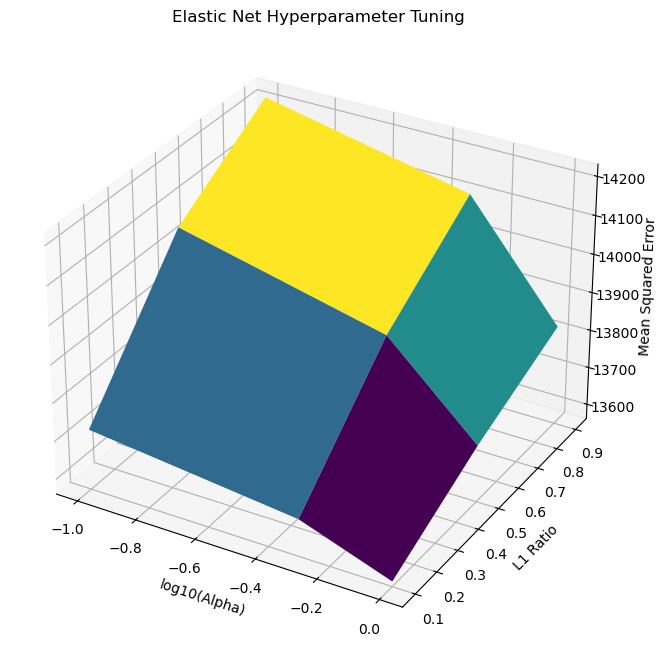

In [68]:
# Extract hyperparameter values and corresponding mean squared errors from the grid search results
alphas= param_grid["alpha"]
l1_ratios = param_grid["l1_ratio"]
mse_values = -grid_search.cv_results_['mean_test_score'].reshape(len(alphas), len(l1_ratios))

# Create a meshgrid for 3D plot
alpha_mesh, l1_ratio_mesh = np.meshgrid(alphas, l1_ratios)

# Plot the mean squared error against different alpha and l1_ratio values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(alpha_mesh), l1_ratio_mesh, mse_values, cmap='viridis')
ax.set_title('Elastic Net Hyperparameter Tuning')
ax.set_xlabel('log10(Alpha)')
ax.set_ylabel('L1 Ratio')
ax.set_zlabel('Mean Squared Error')

plt.show()

Lasso Regression

In [69]:
# Lasso Regression
lasso = Lasso(random_state=42)

# Define the hyperparameter grid for Lasso
lasso_param_grid = {'alpha': [0.1, 0.3 , 0.5, 0.7 , 1.0]}

# Create GridSearchCV object for Lasso
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train, y_train)

# Get the best alpha for Lasso
best_lasso_alpha = lasso_grid_search.best_params_['alpha']

# Create Lasso model with the best alpha
best_lasso = Lasso(alpha=best_lasso_alpha, random_state=42)

# Train the Lasso model on the combined training and validation sets
best_lasso.fit(X_train_val, y_train_val)

# Make predictions with Lasso on the test set
y_pred_test_lasso = best_lasso.predict(X_test)
y_pred_train_lasso = best_lasso.predict(X_train)

# Evaluate the Lasso model on the test set
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))

print(f'Lasso Root Mean Squared Error on Test Set: {rmse_test_lasso}')
print(f'Lasso Root Mean Squared Error on Train Set: {rmse_train_lasso}')


Lasso Root Mean Squared Error on Test Set: 161.71902729358834
Lasso Root Mean Squared Error on Train Set: 116.23384324846364


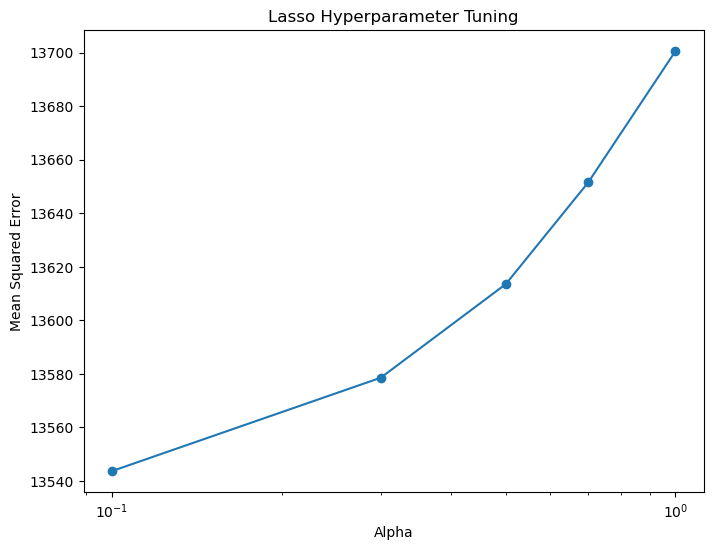

In [70]:
# Extract hyperparameter values and corresponding mean squared errors from the grid search results
alphas_lasso=lasso_param_grid["alpha"]
mse_values_lasso = -lasso_grid_search.cv_results_['mean_test_score']

# Plot the mean squared error against different alpha values for Lasso
plt.figure(figsize=(8, 6))
plt.plot(alphas_lasso, mse_values_lasso, marker='o')
plt.title('Lasso Hyperparameter Tuning')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Log scale for better visualization if alpha values vary widely
plt.show()

In [71]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge(random_state=42)

# Define the hyperparameter grid for Ridge
ridge_param_grid = {'alpha': [0.1, 0.3 , 0.5, 0.7 , 1.0]}

# Create GridSearchCV object for Ridge
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train, y_train)

# Get the best alpha for Ridge
best_ridge_alpha = ridge_grid_search.best_params_['alpha']

# Create Ridge model with the best alpha
best_ridge = Ridge(alpha=best_ridge_alpha, random_state=42)

# Train the Ridge model on the combined training and validation sets
best_ridge.fit(X_train_val, y_train_val)

# Make predictions with Ridge on the test set
y_pred_test_ridge = best_ridge.predict(X_test)
y_pred_train_ridge = best_ridge.predict(X_train)

# Evaluate the Ridge model on the test set
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))

print(f'Ridge Root Mean Squared Error on Test Set: {rmse_test_ridge}')
print(f'Ridge Root Mean Squared Error on Train Set: {rmse_train_ridge}')


Ridge Root Mean Squared Error on Test Set: 161.75929162739564
Ridge Root Mean Squared Error on Train Set: 116.20506332418745


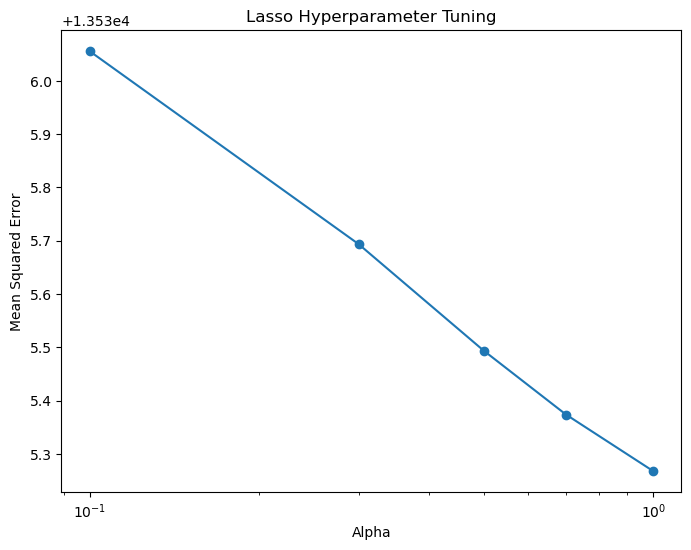

In [72]:
alphas_ridge=ridge_param_grid["alpha"]
mse_values_ridge = -ridge_grid_search.cv_results_['mean_test_score']

# Plot the mean squared error against different alpha values for Lasso
plt.figure(figsize=(8, 6))
plt.plot(alphas_ridge, mse_values_ridge, marker='o')
plt.title('Lasso Hyperparameter Tuning')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Log scale for better visualization if alpha values vary widely
plt.show()

**Even though the results are fairly similar, the results from the Ridge Regression show the smallest values in terms
of the RMSE value**

In [73]:
# Elastic Net
coefficients_elastic = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': best_elastic_net.coef_})
coefficients_elastic = coefficients_elastic.reindex(coefficients_elastic['Coefficient'].abs().sort_values(ascending=False).index)
top3_elastic = coefficients_elastic.head(3)
top3_elastic_string = f'{top3_elastic.to_string(index=False)}'

# Ridge
coefficients_ridge = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': best_ridge.coef_.flatten()})
coefficients_ridge = coefficients_ridge.reindex(coefficients_ridge['Coefficient'].abs().sort_values(ascending=False).index)
top3_ridge = coefficients_ridge.head(3)
top3_ridge_string = f'{top3_ridge.to_string(index=False)}'

# Lasso
coefficients_lasso = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': best_lasso.coef_})
coefficients_lasso = coefficients_lasso.reindex(coefficients_lasso['Coefficient'].abs().sort_values(ascending=False).index)
top3_lasso = coefficients_lasso.head(3)
top3_lasso_string = f'{top3_lasso.to_string(index=False)}'

# Elastic Net
top3_elastic_names = top3_elastic['Feature'].to_list()
top3_elastic_names_string = f'{", ".join(top3_elastic_names)}'

# Ridge
top3_ridge_names = top3_ridge['Feature'].to_list()
top3_ridge_names_string = f'{", ".join(top3_ridge_names)}'

# Lasso
top3_lasso_names = top3_lasso['Feature'].to_list()
top3_lasso_names_string = f' {", ".join(top3_lasso_names)}'

print(top3_elastic_names_string)
print(top3_ridge_names_string)
print(top3_lasso_names_string)



availability_365, room_type_Private room, room_type_Shared room
room_type_Shared room, reviews_per_month, center_distance
 room_type_Shared room, availability_365, room_type_Hotel room


In [74]:
#Elastic
y_pred_elastic = best_elastic_net.predict(X_test)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

#Ridge
y_pred_ridge = best_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

#Ridge
y_pred_lasso = best_lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Create a DataFrame to store and display results
results = pd.DataFrame({
    'Model': ['Elastic net', 'Lasso Regression', 'Ridge Regression'],
    'RMSE Train': [rmse_train_elastic, rmse_train_lasso, rmse_train_ridge],
    'RMSE Test': [rmse_test_elastic, rmse_test_lasso, rmse_test_ridge],
    'Most important coefficients' :[top3_elastic_names_string, top3_lasso_names_string, top3_ridge_names_string]
})

# Display the results
print(results)

              Model  RMSE Train   RMSE Test  \
0       Elastic net  116.357137  161.762317   
1  Lasso Regression  116.233843  161.719027   
2  Ridge Regression  116.205063  161.759292   

                         Most important coefficients  
0  availability_365, room_type_Private room, room...  
1   room_type_Shared room, availability_365, room...  
2  room_type_Shared room, reviews_per_month, cent...  



The RMSE values for Elastic Net, Lasso Regression, and Ridge Regression on both training and test datasets are quite close, with only marginal differences. This suggests that these three regression models perform similarly in predicting the target variable, indicating robustness across different regularization approaches. However, the Ridge Regression shows slightly better results than the other methods.

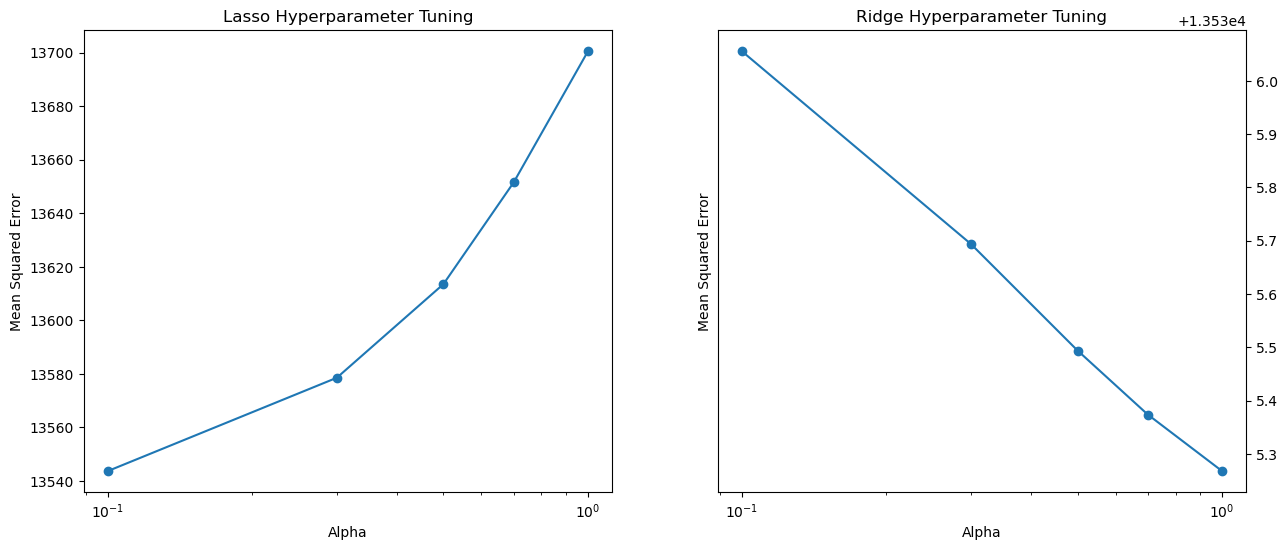

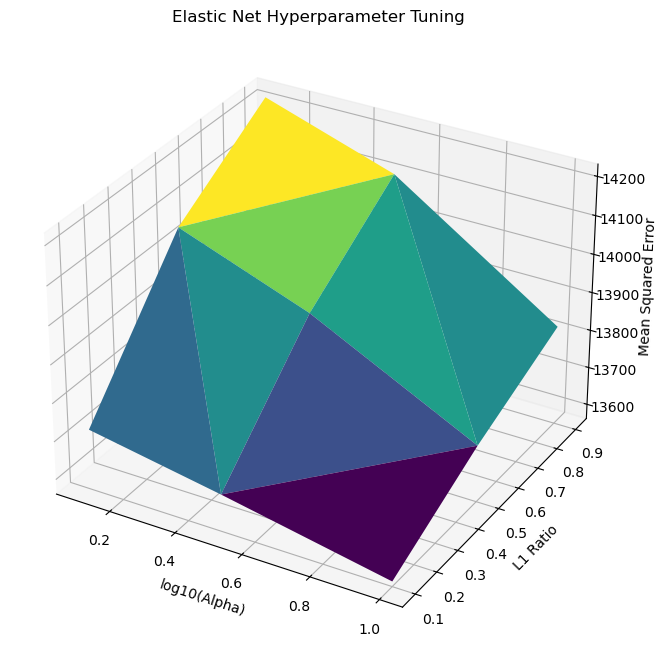

In [75]:
# Plot the mean squared error against different alpha values for Lasso and Ridge
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Lasso Hyperparameter Tuning
ax1.plot(alphas_lasso, mse_values_lasso, marker='o')
ax1.set_title('Lasso Hyperparameter Tuning')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xscale('log')  # Log scale for better visualization if alpha values vary widely

# Ridge Hyperparameter Tuning
ax2.plot(alphas_ridge, mse_values_ridge, marker='o')
ax2.set_title('Ridge Hyperparameter Tuning')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('Mean Squared Error')
ax2.set_xscale('log')  # Log scale for better visualization if alpha values vary widely
ax2.yaxis.tick_right()  # Move y-axis ticks and labels to the right side

# Create a meshgrid for 3D plot
alpha_mesh, l1_ratio_mesh = np.meshgrid(alphas, l1_ratios)

# Plot the mean squared error against different alpha and l1_ratio values for Elastic Net
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(alpha_mesh.flatten(), l1_ratio_mesh.flatten(), mse_values.flatten(), cmap='viridis')
ax.set_title('Elastic Net Hyperparameter Tuning')
ax.set_xlabel('log10(Alpha)')
ax.set_ylabel('L1 Ratio')
ax.set_zlabel('Mean Squared Error')

plt.show()

### Evaluation

#### a) Apply the final model on the test data and document performance.

In [84]:
y_pred_test = best_ridge.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Ridge Root Mean Squared Error on Test Set: {rmse_test_ridge}')

Ridge Root Mean Squared Error on Test Set: 161.6661929017363


As the final model we choose the ridge regression, because it showed the best results (not by much though) and is considered robust against colinearity.
The RMSE is 161.67, a bit higher than the reported RMSE on the train set (~116) from the previous section.

#### b)  Re-train the model with identical hyper-parameters using the full train and validation data and again apply it on the test data, documenting and reflecting on the performance

In [95]:
print("Best alpha parameter: ", best_ridge_alpha)

full_ridge = Ridge(alpha = best_ridge_alpha, random_state = 42)

# retrain on the full training set (train + validation)
full_ridge.fit(X_train_val, y_train_val)

y_pred_full = full_ridge.predict(X_test)

rmse_test_full = np.sqrt(mean_squared_error(y_test, y_pred_full))
print(f'Ridge Root Mean Squared Error on Test Set fitted on full training data: {rmse_test_full}')
print(f'Standard deviation: {np.std(y_test - y_pred_full)}')
print('RMSE test: ' + str(math.sqrt(sklm.mean_squared_error(y_pred_full, y_test))))

Best alpha parameter:  1.0
Ridge Root Mean Squared Error on Test Set fitted on full training data: 161.75929162739564
Standard deviation: price    161.759259
dtype: float64


c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


If we retrain the model on the full training data (train + validation set) the performance as measured by the RMSE is nearly identical.

#### c) Identify and document
* i. state-of-the-art performance, i.e. the performance obtained by others using
the same (albeit potentially slightly differently pre-processed) data set as reported
in literature (preferably in peer-reviewed papers, in absence of these grey literature
or solid internet publications are fine as well).
If no baseline performance can be identified for your task, report on other
analyses/tasks using the same dataset.

The only baseline performance we could identify for this task was a notebook from kaggle (https://www.kaggle.com/code/lennarthaupts/airbnb-prices-in-berlin/notebook).
They reported a minimum RMSE on the test set of ~ 34 using a Random Forest Regressor, which is quite a drastic difference. The used features are "minimum_nights", "latitude", "longitude", "reviews_per_month", "number_of_reviews", "availability_365", "dist_to_centre", "calculated_host_listings_count", "last_review", "room_type", "neighbourhood_group", "n_missing", "region_west" and "region_east". So they constructed a set of additional features region, distance to centre and an indicator for missing values.

* ii. the expected base-line performance of a trivial acceptor / rejecter or random
classifier

In [102]:
# simple baseline model - using the mean

mean = np.mean(y_train)

y_pred_mean = np.full(len(y_test), mean)

rmse_test_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))
print(f'Ridge Root Mean Squared Error on Test Set with baseline mean: {rmse_test_mean}')

Ridge Root Mean Squared Error on Test Set with baseline mean: 165.315478139701


The baseline model, which is simply taking the mean of the training set, achieves a slightly higher RMSE than the Ridge regression, but not by much.

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


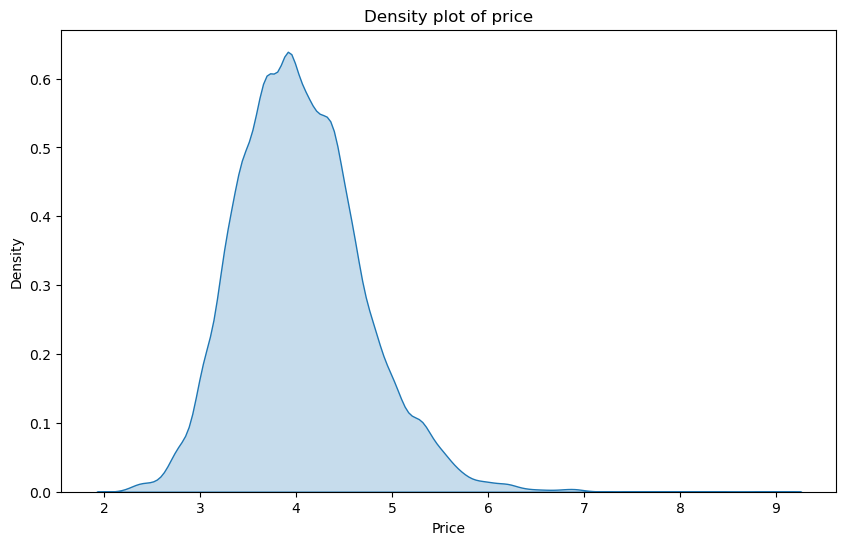

In [113]:
# show density of log transformed price
# according to the plot, predictions might be improved if we log transform the target variable - however, we would lose interpretability of the target price
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log1p(df_final['price'].dropna()), fill=True)
plt.title('Density plot of price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

In [111]:
# log transform the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

ridge = Ridge(random_state=42)

ridge_param_grid = {'alpha': [0.1, 0.3 , 0.5, 0.7 , 1.0]}
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs=-1)

ridge_grid_search.fit(X_train, y_train_log)
best_ridge_alpha = ridge_grid_search.best_params_['alpha']

# Create Ridge model with the best alpha
best_ridge = Ridge(alpha=best_ridge_alpha, random_state=42)

best_ridge.fit(X_train, y_train_log)

# Make predictions with Ridge on the test set
y_pred_test_ridge = best_ridge.predict(X_test)
y_pred_train_ridge = best_ridge.predict(X_train)

# Evaluate the Ridge model on the test set
rmse_test_ridge = np.sqrt(mean_squared_error(y_test_log, y_pred_test_ridge))
rmse_train_ridge = np.sqrt(mean_squared_error(y_train_log, y_pred_train_ridge))

print(f'Ridge Root Mean Squared Error on Test Set: {rmse_test_ridge}')
print(f'Ridge Root Mean Squared Error on Train Set: {rmse_train_ridge}')


Ridge Root Mean Squared Error on Test Set: 0.48553086463870965
Ridge Root Mean Squared Error on Train Set: 0.49615495362475653


#### d) Compare the performance achieved with the benchmark and baseline performances

according to different metrics (i.e. overall, but also on per-class level (confusion matrix),
micro/macro precision/recall in the case of classification tasks, regression errors in certain
parts of the data space, … (Note your goal is not necessarily to obtain a better result than
what has been reported in the state of the art, this is not a grading criterion! On the other
hand, if the performance of your classifiers is below a random baseline or trivial acceptor
/ rejecter you may want to investigate the reason…)

As already mentioned above the RMSE of the ridge regression is slightly better than a simple baseline, which is always predicting the mean.
However, the RMSE compared to the benchmark peformance is quite high. This possibly stems from using different features, but also how the preprocessing was done.
The benchmark model cut out all listings which had a price greater than 300 €. Initally, we decided against removing high listed prices, because we wanted our model to focus on the whole price spectrum.
Considering the high RMSE difference though, we will try with removing high priced listings as well. 

c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Home\anaconda3\envs\bienv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


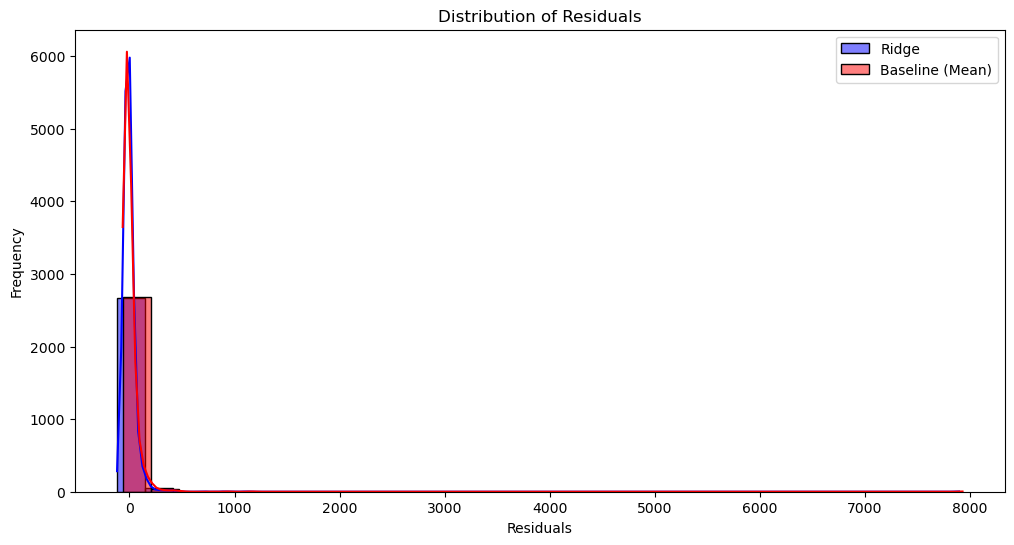

In [142]:
# inspecting residuals between baseline and ridge predictions
y_test_list = y_test['price'].tolist()
residuals_ridge = y_test_list - y_pred_test
residuals_mean = y_test_list - y_pred_mean

plt.figure(figsize=(12, 6))
sns.histplot(residuals_ridge, bins=30, label='Ridge', kde=True, color='blue')
sns.histplot(residuals_mean, bins=30, label='Baseline (Mean)', kde=True, color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()

The residuals are generally centered around the mean, which is a good sign. Also the spread of the residuals between ridge and the baseline model does not seem to be too different, as also indicated by the RMSE values. However, the right skewed distribution from the ridge residuals, might indicate that the model is worse at predicting higher priced listings. We inspect this by comparing segment wise RMSE's.

In [173]:
# segment-wise RMSE calculation by percentiles (below 33%, between 33% and 66%, above 66%)
low_price = y_test_list <= np.percentile(y_test_list, 33) 
medium_price = (y_test_list > np.percentile(y_test_list, 33)) & (y_test_list <= np.percentile(y_test_list, 66))
high_price = y_test_list > np.percentile(y_test_list, 66)

print(f"Low price threshold: {np.percentile(y_test_list, 33)}")
print(f"High price threshold: {np.percentile(y_test_list, 66)}")

# calculate RMSE for each segment by percentiles
for segment, name in zip([low_price, medium_price, high_price], ['Low', 'Medium', 'High']):
    rmse_ridge = np.sqrt(mean_squared_error(y_test[segment], y_pred_test[segment]))
    rmse_mean = np.sqrt(mean_squared_error(y_test[segment], y_pred_mean[segment]))
    print(f'{name} Price Segment - Ridge RMSE: {rmse_ridge}, Baseline RMSE: {rmse_mean}')

Low price threshold: 40.0
High price threshold: 70.0
Low Price Segment - Ridge RMSE: 29.09376080126129, Baseline RMSE: 43.44583956727784
Medium Price Segment - Ridge RMSE: 30.427606323428897, Baseline RMSE: 19.62167791079075
High Price Segment - Ridge RMSE: 280.02218743167214, Baseline RMSE: 285.2093888845241


In [171]:
# segment-wise RMSE calculation by standard deviations
# since the std is greater than the mean, we use the mean as a threshold for low prices

mean_price = np.mean(y_test_list)
std_dev_price = np.std(y_test_list)

low_price_threshold = mean_price
high_price_threshold = mean_price + std_dev_price

print(f"Low price threshold: {low_price_threshold}")
print(f"High price threshold: {high_price_threshold}")

low_price = y_test_list < low_price_threshold
medium_price = (y_test_list >= low_price_threshold) & (y_test_list <= high_price_threshold)
high_price = y_test_list > high_price_threshold

# calculate RMSE for each segment by percentiles
for segment, name in zip([low_price, medium_price, high_price], ['Low', 'Medium', 'High']):
    rmse_ridge = np.sqrt(mean_squared_error(y_test[segment], y_pred_test[segment]))
    rmse_mean = np.sqrt(mean_squared_error(y_test[segment], y_pred_mean[segment]))
    print(f'{name} Price Segment - Ridge RMSE: {rmse_ridge}, Baseline RMSE: {rmse_mean}')

Low price threshold: 72.8481291269259
High price threshold: 238.16350962033627
Low Price Segment - Ridge RMSE: 29.708310594179224, Baseline RMSE: 34.28706662574262
Medium Price Segment - Ridge RMSE: 44.46483603772739, Baseline RMSE: 54.4847405240697
High Price Segment - Ridge RMSE: 1008.2336798449118, Baseline RMSE: 1021.6851073774764


The segment wise RMSE calculation shows that especially higher prices are difficult to predict. The RMSE on prices below ~ 238 is very much comparable to the benchmark performance given by kaggle. 

#### e) Compare the performance obtained with the success criteria defined in the Business Understanding phase. 

See report



#### f) Identify a “protected attribute” and evaluate whether the model exhibits a bias 
towards that group. The attribute can be one that may be considered sensitive or – in
absence of any actually sensitive attributes – any attribute that identifies a subgroup of the
data for which you may want to identify skewed performance of the model.

Considering the absence of any actually sensitive attribute, the neighbourhood group will be chosen as a proxy for geographic bias and as a means to investigate potential skewed performance.

In [203]:
neighbourhood_cols = [col for col in X_test.columns if 'neighbourhood_group' in col]

rmse_values = {}
proportion_values = {}
for neighbourhood in neighbourhood_cols:
    mask = X_test[neighbourhood] == 1
    X_test_segment = X_test[mask]
    Y_test_segment = y_test[mask]
    y_pred_segment = best_ridge.predict(X_test_segment)

    # calculate rmse for each neighbourdhood
    rmse_segment = np.sqrt(mean_squared_error(Y_test_segment, y_pred_segment))
    rmse_values[neighbourhood] = rmse_segment
    print(f'RMSE for {neighbourhood}: {rmse_segment}')

    # report on proportion of listings above $300 in each neighbourhood
    df_neighbourhood = df[df['neighbourhood_group'] == neighbourhood.split('neighbourhood_group_')[1]]
    high_priced_listings = df_neighbourhood[df_neighbourhood['price'] > 300]
    proportion = len(high_priced_listings) / len(df_neighbourhood) if len(df_neighbourhood) > 0 else 0
    proportion_values[neighbourhood] = proportion
    print(f'Proportion of listings above $300 in {neighbourhood}: {proportion:.2%}')

RMSE for neighbourhood_group_Friedrichshain-Kreuzberg: 81.46687261742152
Proportion of listings above $300 in neighbourhood_group_Friedrichshain-Kreuzberg: 0.90%
RMSE for neighbourhood_group_Lichtenberg: 56.461890806494026
Proportion of listings above $300 in neighbourhood_group_Lichtenberg: 1.17%
RMSE for neighbourhood_group_Marzahn - Hellersdorf: 91.61460019570504
Proportion of listings above $300 in neighbourhood_group_Marzahn - Hellersdorf: 1.45%
RMSE for neighbourhood_group_Mitte: 351.1194490058409
Proportion of listings above $300 in neighbourhood_group_Mitte: 1.94%
RMSE for neighbourhood_group_Neukölln: 60.070098318261174
Proportion of listings above $300 in neighbourhood_group_Neukölln: 0.43%
RMSE for neighbourhood_group_Pankow: 85.07457523695459
Proportion of listings above $300 in neighbourhood_group_Pankow: 0.95%
RMSE for neighbourhood_group_Reinickendorf: 42.36997285047385
Proportion of listings above $300 in neighbourhood_group_Reinickendorf: 0.40%
RMSE for neighbourhood_g

The rmse values suggest, there is high bias towards to the neighbourhood group Mitte, as it has by far the highest RMSE. The neigbourhood group Reinickendorf has the lowest RMSE, but also has comparatively few datapoints. We suspect the price might be a reason for the high disparity between Mitte and other neighbourhoods.

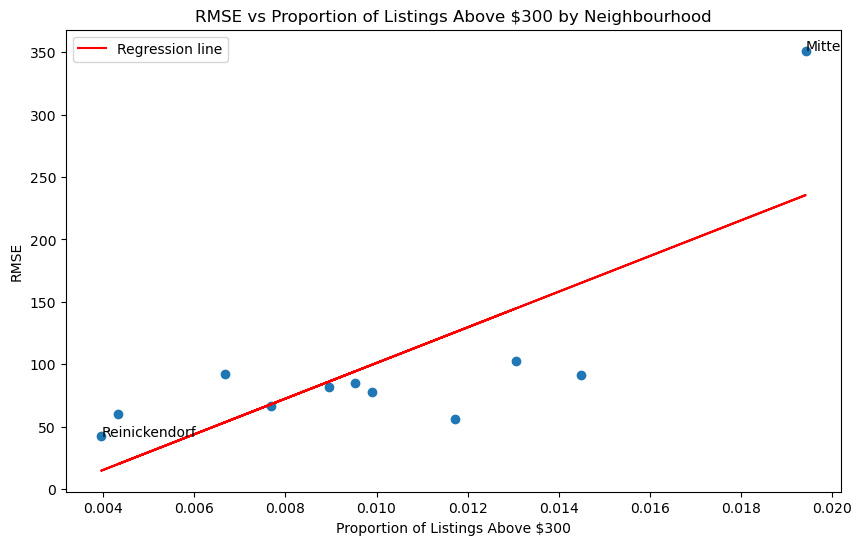

In [218]:
from scipy.stats import linregress

proportions = list(proportion_values.values())
rmses = list(rmse_values.values())

# calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(proportions, rmses)
line = [slope * x + intercept for x in proportions]

plt.figure(figsize=(10, 6))
plt.scatter(proportions, rmses)

# plot regression line
plt.plot(proportions, line, 'r', label=f'Regression line')

# label selected neighbourhood points
plt.annotate("Mitte", (proportion_values['neighbourhood_group_Mitte'], rmse_values['neighbourhood_group_Mitte']))
plt.annotate("Reinickendorf", (proportion_values['neighbourhood_group_Reinickendorf'], rmse_values['neighbourhood_group_Reinickendorf']))

plt.xlabel('Proportion of Listings Above $300')
plt.ylabel('RMSE')
plt.title('RMSE vs Proportion of Listings Above $300 by Neighbourhood')
plt.legend()
plt.show()

In [190]:
# inspect price distribution of mitte
mitte_data = df[df['neighbourhood_group'] == 'Mitte']

print("Mitte Price Descriptive Statistics:")
print(mitte_data['price'].describe())

# inspect price distribution of other neighbourhoods
other_data = df[df['neighbourhood_group'] != 'Mitte']

print("--------------------------------------------------")
print("Other Neighbourhoods Price Descriptive Statistics:")
print(other_data['price'].describe())

Mitte Price Descriptive Statistics:
count    3913.000000
mean       86.201380
std       159.762357
min         9.000000
25%        35.000000
50%        60.000000
75%        99.000000
max      8000.000000
Name: price, dtype: float64
--------------------------------------------------
Other Neighbourhoods Price Descriptive Statistics:
count    14254.000000
mean        69.943034
std        130.596285
min          8.000000
25%         35.000000
50%         50.000000
75%         80.000000
max       8000.000000
Name: price, dtype: float64


In [186]:
# inspect price distribution of reinickendorf
reinickendorf_data = df[df['neighbourhood_group'] == 'Reinickendorf']

print("Reinickendorf Price Descriptive Statistics:")
print(reinickendorf_data['price'].describe())

Reinickendorf Price Descriptive Statistics:
count    253.000000
mean      53.063241
std       60.893512
min       10.000000
25%       29.000000
50%       40.000000
75%       60.000000
max      880.000000
Name: price, dtype: float64


The calculated statistics support the assumption that the price might be the reason that some neighbourhoods have a higher RMSE value. As the neighbourhood group Mitte has higher 50& and 75% percent quantiles in respect to price than the other neighbourhoods. Furthermore, Reinickendorf, which has the lowest RMSE values, has below average price values.